In [1]:
import os
import os.path as osp
import random
import torch
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import pytorch_warmup as warmup
from scipy.stats import pearsonr, spearmanr, kendalltau
import wandb
from datasets import create_datalists, create_datasets
from models.get_models import get_model
import output
from validate import valid
import analysis
from analysis.util import plot_dist

In [2]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'Ensemble', 'pretrain': 'None'})
# model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'DNCNN_epoch_179_alldata.pth'), map_location="cpu"), strict=True)
# model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
validation:   0%|          | 4/1000 [00:00<01:10, 14.08it/s]

dncnn 2.890049457550049
1
diff: 0.090049505
#
dncnn 1.716446042060852
1
diff: -0.08355391
#
dncnn 2.4516234397888184
1
diff: -0.94837666
1
#
dncnn 2.1543385982513428
1
diff: 0.1543386
#
dncnn 1.7639583349227905
1
diff: -0.23604167
#
dncnn 1.0755912065505981
1
diff: 0.8755912
2
#
dncnn 1.088837742805481


validation:   1%|          | 12/1000 [00:00<00:39, 25.25it/s]

1
diff: 0.48883772
#
dncnn 3.053603172302246
1
diff: -0.9463968
3
#
dncnn 0.9055308699607849
1
diff: 0.90553087
4
#
dncnn 1.792970895767212
1
diff: 0.19297087
#
dncnn 3.0596814155578613
1
diff: -0.9403186
5
#
dncnn 2.8817498683929443
1
diff: 0.6817498
6
#
dncnn 1.0963232517242432
1
diff: 0.49632323
#


validation:   2%|▏         | 20/1000 [00:00<00:32, 30.23it/s]

dncnn 2.6337146759033203
1
diff: 0.23371458
#
dncnn 1.5513360500335693
1
diff: 0.351336
#
dncnn 2.9093523025512695
1
diff: -1.0906477
7
#
dncnn 2.377824068069458
1
diff: 0.37782407
#
dncnn 0.9817463159561157
1
diff: 0.3817463
#
dncnn 1.4364337921142578
1
diff: 0.036433816
#
dncnn 2.7832136154174805
1
diff: -0.8167863
8
#
dncnn 1.7189710140228271


validation:   2%|▏         | 24/1000 [00:00<00:31, 30.81it/s]

1
diff: 0.11897099
#
dncnn 1.0288199186325073
1
diff: 0.82881993
9
#
dncnn 2.9703707695007324
1
diff: -0.8296292
10
#
dncnn 2.7018234729766846
1
diff: 0.5018234
11
#
dncnn 1.0695061683654785
1
diff: 0.06950617
#
dncnn 2.893505811691284
1
diff: -0.90649414
12
#
dncnn 1.2897841930389404
1
diff: -0.11021578
#
dncnn 2.5713772773742676


validation:   3%|▎         | 32/1000 [00:01<00:31, 30.91it/s]

1
diff: 0.37137723
#
dncnn 2.440049648284912
1
diff: 0.2400496
#
dncnn 0.9024654030799866
1
diff: 0.50246537
13
#
dncnn 2.771782398223877
1
diff: -0.42821765
#
dncnn 1.945784330368042
1
diff: 0.14578438
#
dncnn 1.8297113180160522
1
diff: 0.029711366
#
dncnn 1.0199309587478638
1
diff: 0.21993095


validation:   4%|▍         | 40/1000 [00:01<00:29, 32.33it/s]

#
dncnn 1.429641842842102
1
diff: -0.17035818
#
dncnn 1.0039258003234863
1
diff: -0.39607418
#
dncnn 1.2367504835128784
1
diff: 0.23675048
#
dncnn 2.500896692276001
1
diff: -1.4991033
14
#
dncnn 1.323638916015625
1
diff: 0.32363892
#
dncnn 1.5453630685806274
1
diff: -0.25463688
#
dncnn 1.746842622756958


validation:   4%|▍         | 44/1000 [00:01<00:29, 31.91it/s]

1
diff: 0.1468426
#
dncnn 2.3487789630889893
1
diff: -0.451221
#
dncnn 2.7531237602233887
1
diff: -0.4468763
#
dncnn 2.5155811309814453
1
diff: -0.88441896
15
#
dncnn 2.1712119579315186
1
diff: 0.371212
#
dncnn 1.69355309009552
1
diff: 0.2935531
#


validation:   5%|▌         | 52/1000 [00:01<00:29, 31.92it/s]

dncnn 1.176498293876648
1
diff: 0.57649827
16
#
dncnn 1.6050713062286377
1
diff: 0.20507133
#
dncnn 2.265690565109253
1
diff: -0.13430953
#
dncnn 3.006795644760132
1
diff: 0.20679569
#
dncnn 1.3301254510879517
1
diff: -0.4698745
#
dncnn 2.829291820526123
1
diff: 0.22929192
#
dncnn 2.741088628768921
1
diff: 0.34108853
#
dncnn 2.4294919967651367


validation:   6%|▌         | 60/1000 [00:02<00:29, 32.01it/s]

1
diff: -0.77050805
17
#
dncnn 2.3669700622558594
1
diff: 0.76697004
18
#
dncnn 2.7770838737487793
1
diff: -0.42291617
#
dncnn 2.5211973190307617
1
diff: 0.32119727
#
dncnn 1.2739646434783936
1
diff: -0.12603533
#
dncnn 1.9925179481506348
1
diff: 0.592518
19
#
dncnn 2.9406824111938477
1
diff: -0.45931768
#


validation:   6%|▋         | 64/1000 [00:02<00:28, 33.07it/s]

dncnn 2.334801197052002
1
diff: 0.3348012
#
dncnn 1.0175632238388062
1
diff: 0.4175632
#
dncnn 2.2321794033050537
1
diff: 1.0321794
20
#
dncnn 2.001495838165283
1
diff: 0.20149589
#
dncnn 2.3202879428863525
1
diff: -0.27971196
#
dncnn 2.7631959915161133
1
diff: -0.23680401
#
dncnn 1.9353941679000854


validation:   7%|▋         | 72/1000 [00:02<00:28, 32.51it/s]

1
diff: -0.06460583
#
dncnn 1.0569210052490234
1
diff: 0.256921
#
dncnn 2.4520983695983887
1
diff: 0.052098274
#
dncnn 2.7904245853424072
1
diff: 0.19042468
#
dncnn 3.0119729042053223
1
diff: -0.78802705
21
#
dncnn 1.7710007429122925
1
diff: 0.37100077
#
dncnn 2.4739842414855957
1
diff: -0.12601566
#


validation:   8%|▊         | 80/1000 [00:02<00:28, 31.98it/s]

dncnn 1.1792001724243164
1
diff: 0.7792002
22
#
dncnn 1.8653947114944458
1
diff: 0.46539474
#
dncnn 1.030444622039795
1
diff: 1.0304446
23
#
dncnn 2.794710874557495
1
diff: 0.19471097
#
dncnn 2.9199259281158447
1
diff: 0.51992583
24
#
dncnn 2.266634702682495
1
diff: -0.7333653
25
#
dncnn 1.0455882549285889
1
diff: -0.1544118
#


validation:   8%|▊         | 84/1000 [00:02<00:28, 31.95it/s]

dncnn 1.1366252899169922
1
diff: 0.7366253
26
#
dncnn 0.9415981769561768
1
diff: 0.7415982
27
#
dncnn 2.858799695968628
1
diff: -0.7412002
28
#
dncnn 1.4526225328445435
1
diff: 0.052622557
#
dncnn 2.4132895469665527
1
diff: 0.013289452
#
dncnn 2.841712713241577
1
diff: -0.7582872
29
#


validation:   9%|▉         | 92/1000 [00:03<00:27, 33.19it/s]

dncnn 2.9463951587677
1
diff: -0.05360484
#
dncnn 2.679961681365967
1
diff: -0.32003832
#
dncnn 2.848654270172119
1
diff: 0.048654318
#
dncnn 2.5898303985595703
1
diff: -0.4101696
#
dncnn 1.1531298160552979
1
diff: -0.04687023
#
dncnn 2.9595236778259277
1
diff: -0.6404762
30
#
dncnn 2.1414120197296143
1
diff: 0.74141204
31
#
dncnn 2.443871259689331


validation:  10%|█         | 100/1000 [00:03<00:28, 31.42it/s]

1
diff: -0.15612864
#
dncnn 1.0649174451828003
1
diff: 0.86491746
32
#
dncnn 1.2219258546829224
1
diff: 0.42192584
#
dncnn 1.2328464984893799
1
diff: -0.7671535
33
#
dncnn 2.9084348678588867
1
diff: -1.0915651
34
#
dncnn 1.3656625747680664
1
diff: -0.43433738
#
dncnn 2.831054210662842
1
diff: -0.16894579
#


validation:  10%|█         | 104/1000 [00:03<00:27, 32.35it/s]

dncnn 2.916553497314453
1
diff: -1.0834465
35
#
dncnn 2.7951314449310303
1
diff: -1.2048686
36
#
dncnn 2.683712959289551
1
diff: -0.91628695
37
#
dncnn 2.816298246383667
1
diff: -0.18370175
#
dncnn 1.2716240882873535
1
diff: -0.52837586
38
#
dncnn 1.384526014328003
1
diff: -0.015473962
#
dncnn 2.4647459983825684
1
diff: -0.535254
39
#


validation:  11%|█         | 112/1000 [00:03<00:27, 32.17it/s]

dncnn 1.3233928680419922
1
diff: 0.52339286
40
#
dncnn 2.6085305213928223
1
diff: -1.3914695
41
#
dncnn 1.9813692569732666
1
diff: -0.018630743
#
dncnn 2.784466028213501
1
diff: -0.21553397
#
dncnn 0.9301882386207581
1
diff: 0.73018825
42
#
dncnn 0.980844259262085
1
diff: -0.21915579
#
dncnn 1.7998716831207275
1
diff: -0.0001282692
#


validation:  12%|█▏        | 120/1000 [00:03<00:27, 31.64it/s]

dncnn 2.9432835578918457
1
diff: -0.056716442
#
dncnn 1.2427325248718262
1
diff: 0.4427325
#
dncnn 2.6847939491271973
1
diff: 0.28479385
#
dncnn 1.7525382041931152
1
diff: 0.55253816
43
#
dncnn 2.976743221282959
1
diff: -0.023256779
#
dncnn 1.097117304801941
1
diff: 0.8971173
44
#
dncnn 1.9462953805923462
1
diff: -0.25370467
#
dncnn 3.0200772285461426


validation:  13%|█▎        | 128/1000 [00:04<00:26, 32.67it/s]

1
diff: -0.5799227
45
#
dncnn 3.0622189044952393
1
diff: -0.9377811
46
#
dncnn 2.574589967727661
1
diff: -0.025409937
#
dncnn 1.2933335304260254
1
diff: -0.106666446
#
dncnn 2.310471773147583
1
diff: -0.08952832
#
dncnn 1.8494423627853394
1
diff: 0.24944234
#
dncnn 1.0097625255584717
1
diff: 0.60976255
47
#


validation:  13%|█▎        | 132/1000 [00:04<00:26, 32.62it/s]

dncnn 2.5828168392181396
1
diff: -1.2171831
48
#
dncnn 1.3176225423812866
1
diff: 0.31762254
#
dncnn 1.9692432880401611
1
diff: -0.030756712
#
dncnn 2.432565450668335
1
diff: -0.96743464
49
#
dncnn 1.805320143699646
1
diff: -0.3946799
#
dncnn 2.6369991302490234
1
diff: -0.16300082
#


validation:  14%|█▍        | 140/1000 [00:04<00:26, 32.30it/s]

dncnn 1.8447647094726562
1
diff: -0.15523529
#
dncnn 1.1351903676986694
1
diff: 0.13519037
#
dncnn 2.897611379623413
1
diff: -0.10238862
#
dncnn 1.297804832458496
1
diff: 0.49780482
#
dncnn 1.5880756378173828
1
diff: -0.41192436
#
dncnn 1.0485461950302124
1
diff: 0.048546195
#
dncnn 2.6551880836486816
1
diff: 0.255188
#


validation:  15%|█▍        | 148/1000 [00:04<00:25, 33.03it/s]

dncnn 1.6227020025253296
1
diff: -0.17729795
#
dncnn 1.4386950731277466
1
diff: 0.23869503
#
dncnn 2.2553493976593018
1
diff: -0.3446505
#
dncnn 1.587717056274414
1
diff: 0.387717
#
dncnn 2.0956671237945557
1
diff: 0.29566717
#
dncnn 2.7892816066741943
1
diff: -0.6107185
50
#
dncnn 1.4228746891021729
1
diff: 0.22287464
#
dncnn 1.0166321992874146


validation:  15%|█▌        | 152/1000 [00:04<00:25, 33.33it/s]

1
diff: 0.6166322
51
#
dncnn 2.705061197280884
1
diff: 0.10506129
#
dncnn 0.9921261072158813
1
diff: 0.59212613
52
#
dncnn 2.3477511405944824
1
diff: -0.25224876
#
dncnn 2.5800411701202393
1
diff: -0.019958735
#
dncnn 1.9583717584609985
1
diff: -0.04162824
#
dncnn 2.827880620956421
1
diff: -0.17211938
#


validation:  16%|█▌        | 160/1000 [00:05<00:25, 32.64it/s]

dncnn 1.7897545099258423
1
diff: -0.21024549
#
dncnn 2.4505462646484375
1
diff: -0.14945364
#
dncnn 2.726980209350586
1
diff: 0.1269803
#
dncnn 2.513381004333496
1
diff: -1.0866189
53
#
dncnn 2.783909559249878
1
diff: 0.18390965
#
dncnn 1.11005437374115
1
diff: 0.51005435
54
#
dncnn 2.5541586875915527
1
diff: 0.15415859
#


validation:  17%|█▋        | 168/1000 [00:05<00:25, 32.22it/s]

dncnn 2.7583112716674805
1
diff: -0.44168878
#
dncnn 3.026883125305176
1
diff: -0.7731168
55
#
dncnn 2.8358867168426514
1
diff: 0.43588662
#
dncnn 1.491370677947998
1
diff: 0.0913707
#
dncnn 2.5568814277648926
1
diff: -1.4431186
56
#
dncnn 2.8001105785369873
1
diff: -0.19988942
#
dncnn 1.7103453874588013
1
diff: 0.11034536
#


validation:  18%|█▊        | 176/1000 [00:05<00:25, 32.11it/s]

dncnn 2.7755818367004395
1
diff: 0.37558174
#
dncnn 1.7769346237182617
1
diff: 0.1769346
#
dncnn 2.9849677085876465
1
diff: -0.81503224
57
#
dncnn 2.047504186630249
1
diff: -0.5524957
58
#
dncnn 2.8407657146453857
1
diff: 0.24076581
#
dncnn 1.2541050910949707
1
diff: 0.2541051
#
dncnn 2.3571484088897705
1
diff: 0.15714836
#


validation:  18%|█▊        | 180/1000 [00:05<00:24, 33.33it/s]

dncnn 2.381728410720825
1
diff: -0.018271685
#
dncnn 3.1140940189361572
1
diff: -0.68590593
59
#
dncnn 1.1578786373138428
1
diff: -0.24212134
#
dncnn 1.6791075468063354
1
diff: 0.67910755
60
#
dncnn 3.102926731109619
1
diff: -0.89707327
61
#
dncnn 1.7559871673583984
1
diff: 0.3559872
#
dncnn 1.5254874229431152


validation:  19%|█▉        | 188/1000 [00:05<00:25, 32.37it/s]

1
diff: 0.5254874
62
#
dncnn 1.097239375114441
1
diff: 0.49723935
#
dncnn 1.1760188341140747
1
diff: -0.023981214
#
dncnn 2.1404850482940674
1
diff: -0.059515
#
dncnn 2.407055616378784
1
diff: -0.19294429
#
dncnn 0.9169845581054688
1
diff: 0.91698456
63
#
dncnn 0.7958994507789612
1
diff: 0.79589945
64
#
dncnn 2.920410394668579


validation:  20%|█▉        | 196/1000 [00:06<00:24, 33.03it/s]

1
diff: -0.079589605
#
dncnn 2.5615170001983643
1
diff: -0.038482904
#
dncnn 0.9792875051498413
1
diff: 0.1792875
#
dncnn 2.936006546020508
1
diff: -0.46399355
#
dncnn 2.2619664669036865
1
diff: 0.66196644
65
#
dncnn 1.7319940328598022
1
diff: 0.13199401
#
dncnn 2.6967999935150146
1
diff: 0.2967999
#


validation:  20%|██        | 200/1000 [00:06<00:24, 32.70it/s]

dncnn 2.719534397125244
1
diff: -0.8804655
66
#
dncnn 1.5125305652618408
1
diff: -0.2874694
#
dncnn 1.6017652750015259
1
diff: 0.40176523
#
dncnn 2.106787919998169
1
diff: -0.09321213
#
dncnn 2.919997453689575
1
diff: 0.51999736
67
#
dncnn 1.2457575798034668
1
diff: -0.5542424
68
#


validation:  21%|██        | 208/1000 [00:06<00:24, 32.31it/s]

dncnn 1.4935606718063354
1
diff: -0.10643935
#
dncnn 2.470381498336792
1
diff: -0.1296184
#
dncnn 2.035263776779175
1
diff: 0.035263777
#
dncnn 2.9627785682678223
1
diff: 0.16277862
#
dncnn 2.7679131031036377
1
diff: 0.1679132
#
dncnn 2.7635912895202637
1
diff: -0.23640871
#
dncnn 0.8998947143554688
1
diff: 0.8998947
69
#


validation:  22%|██▏       | 216/1000 [00:06<00:23, 33.56it/s]

dncnn 1.5870778560638428
1
diff: -0.012922168
#
dncnn 1.69743013381958
1
diff: 0.09743011
#
dncnn 1.2808574438095093
1
diff: 0.28085744
#
dncnn 1.030525803565979
1
diff: 0.6305258
70
#
dncnn 1.488067388534546
1
diff: 0.6880674
71
#
dncnn 2.6975903511047363
1
diff: -0.5024097
72
#
dncnn 3.049396514892578
1
diff: -0.75060344
73
#


validation:  22%|██▏       | 220/1000 [00:06<00:23, 33.08it/s]

dncnn 2.6599133014678955
1
diff: -0.7400868
74
#
dncnn 2.746255874633789
1
diff: -0.25374413
#
dncnn 2.6377499103546143
1
diff: 0.23774981
#
dncnn 1.2169898748397827
1
diff: 0.61698985
75
#
dncnn 2.6102328300476074
1
diff: 0.61023283
76
#
dncnn 2.8860175609588623
1
diff: -0.11398244
#


validation:  23%|██▎       | 228/1000 [00:07<00:23, 32.52it/s]

dncnn 1.4671348333358765
1
diff: 0.06713486
#
dncnn 1.9262741804122925
1
diff: 0.32627416
#
dncnn 2.6207897663116455
1
diff: 0.8207898
77
#
dncnn 2.605156898498535
1
diff: 0.80515695
78
#
dncnn 2.5770630836486816
1
diff: 0.17706299
#
dncnn 1.0333139896392822
1
diff: 0.23331398
#
dncnn 1.0524240732192993
1
diff: 0.25242406
#


validation:  24%|██▎       | 236/1000 [00:07<00:23, 32.33it/s]

dncnn 2.6577823162078857
1
diff: -0.9422176
79
#
dncnn 2.682581901550293
1
diff: -0.7174182
80
#
dncnn 0.9400637149810791
1
diff: 0.1400637
#
dncnn 3.068937301635742
1
diff: -0.9310627
81
#
dncnn 3.0234525203704834
1
diff: -0.37654757
#
dncnn 1.9896175861358643
1
diff: -0.010382414
#
dncnn 0.9796406626701355
1
diff: 0.7796407
82
#


validation:  24%|██▍       | 240/1000 [00:07<00:23, 32.22it/s]

dncnn 1.764549970626831
1
diff: -0.03544998
#
dncnn 1.8199211359024048
1
diff: -0.3800789
#
dncnn 2.872001886367798
1
diff: -0.727998
83
#
dncnn 1.1398125886917114
1
diff: 0.33981258
#
dncnn 1.4972892999649048
1
diff: 0.097289324
#
dncnn 1.7765157222747803
1
diff: -0.02348423
#
dncnn 2.3349320888519287
1
diff: -0.46506786
#
dncnn 1.9178239107131958


validation:  25%|██▍       | 248/1000 [00:07<00:22, 32.95it/s]

1
diff: 0.51782393
84
#
dncnn 1.8147214651107788
1
diff: -0.18527853
#
dncnn 1.9450618028640747
1
diff: 0.14506185
#
dncnn 2.8872487545013428
1
diff: -0.112751245
#
dncnn 2.6879193782806396
1
diff: -0.9120805
85
#
dncnn 1.721296787261963
1
diff: 0.52129674
86
#
dncnn 1.6645288467407227
1
diff: -0.1354711
#


validation:  26%|██▌       | 256/1000 [00:08<00:22, 32.45it/s]

dncnn 1.2416551113128662
1
diff: 0.041655064
#
dncnn 2.5831055641174316
1
diff: -0.6168945
87
#
dncnn 0.9053773283958435
1
diff: 0.70537734
88
#
dncnn 1.0780586004257202
1
diff: 0.0780586
#
dncnn 2.479713201522827
1
diff: -0.1202867
#
dncnn 2.119293689727783
1
diff: -0.2807064
#
dncnn 1.2345576286315918
1
diff: 0.43455762
#


validation:  26%|██▋       | 264/1000 [00:08<00:22, 32.22it/s]

dncnn 1.1873968839645386
1
diff: 0.18739688
#
dncnn 3.005539655685425
1
diff: -0.59446025
89
#
dncnn 1.0238277912139893
1
diff: 0.22382778
#
dncnn 2.703711748123169
1
diff: -0.69628835
90
#
dncnn 2.7797510623931885
1
diff: -0.82024884
91
#
dncnn 1.3782377243041992
1
diff: 0.37823772
#
dncnn 2.03741192817688
1
diff: 0.4374119
#


validation:  27%|██▋       | 268/1000 [00:08<00:22, 32.16it/s]

dncnn 1.063779354095459
1
diff: 0.063779354
#
dncnn 2.008148193359375
1
diff: 0.20814824
#
dncnn 0.870922327041626
1
diff: 0.8709223
92
#
dncnn 2.723952531814575
1
diff: 0.5239525
93
#
dncnn 2.490919589996338
1
diff: 1.0909196
94
#
dncnn 1.867417812347412
1
diff: -0.33258224
#


validation:  28%|██▊       | 276/1000 [00:08<00:22, 32.07it/s]

dncnn 2.884871006011963
1
diff: -0.115128994
#
dncnn 3.049438238143921
1
diff: -0.7505617
95
#
dncnn 1.6555622816085815
1
diff: 0.45556223
#
dncnn 1.5139868259429932
1
diff: -0.0860132
#
dncnn 2.6344165802001953
1
diff: 0.034416676
#
dncnn 2.8346340656280518
1
diff: -0.565366
96
#
dncnn 1.9801157712936401
1
diff: 0.38011575
#
dncnn 1.9152365922927856


validation:  28%|██▊       | 284/1000 [00:08<00:21, 33.07it/s]

1
diff: -0.08476341
#
dncnn 2.5519461631774902
1
diff: -1.4480538
97
#
dncnn 2.70013165473938
1
diff: -0.69986844
98
#
dncnn 2.78060245513916
1
diff: -1.0193975
99
#
dncnn 0.9122757315635681
1
diff: 0.91227573
100
#
dncnn 1.1189870834350586
1
diff: 0.51898706
101
#
dncnn 1.5888206958770752
1
diff: 0.38882065
#


validation:  29%|██▉       | 288/1000 [00:09<00:21, 32.52it/s]

dncnn 1.9791921377182007
1
diff: -0.42080796
#
dncnn 1.422242522239685
1
diff: 0.42224252
#
dncnn 2.4935481548309326
1
diff: -1.3064518
102
#
dncnn 1.664267659187317
1
diff: -0.33573234
#
dncnn 1.1894278526306152
1
diff: -1.2105722
103
#
dncnn 2.8920059204101562
1
diff: -0.5079942
104
#


validation:  30%|██▉       | 296/1000 [00:09<00:21, 32.25it/s]

dncnn 2.3380980491638184
1
diff: 0.138098
#
dncnn 3.0324935913085938
1
diff: -0.5675063
105
#
dncnn 2.8325672149658203
1
diff: 0.032567263
#
dncnn 2.7483232021331787
1
diff: -1.0516768
106
#
dncnn 0.9040613174438477
1
diff: 0.9040613
107
#
dncnn 1.247871994972229
1
diff: 0.44787198
#
dncnn 1.1353577375411987
1
diff: 0.13535774
#


validation:  30%|███       | 304/1000 [00:09<00:20, 33.38it/s]

dncnn 1.9376484155654907
1
diff: 0.53764844
108
#
dncnn 2.9648079872131348
1
diff: -0.035192013
#
dncnn 2.370027542114258
1
diff: -0.4299724
#
dncnn 2.261885643005371
1
diff: -0.13811445
#
dncnn 1.6910163164138794
1
diff: 0.29101634
#
dncnn 2.6499381065368652
1
diff: -0.55006194
109
#
dncnn 1.2495814561843872
1
diff: -0.5504185
110
#


validation:  31%|███       | 308/1000 [00:09<00:20, 32.95it/s]

dncnn 2.5470545291900635
1
diff: -1.4529455
111
#
dncnn 2.4923136234283447
1
diff: -0.30768633
#
dncnn 1.3322699069976807
1
diff: 0.5322699
112
#
dncnn 2.697923421859741
1
diff: -0.7020767
113
#
dncnn 1.6928210258483887
1
diff: -0.10717893
#
dncnn 2.0096819400787354
1
diff: -0.39031816
#


validation:  32%|███▏      | 316/1000 [00:09<00:21, 32.42it/s]

dncnn 2.9309639930725098
1
diff: -0.06903601
#
dncnn 2.7800233364105225
1
diff: 0.18002343
#
dncnn 2.5436770915985107
1
diff: -1.4563229
114
#
dncnn 2.530921697616577
1
diff: 0.1309216
#
dncnn 0.8955016136169434
1
diff: 0.8955016
115
#
dncnn 1.918578863143921
1
diff: -0.08142114
#
dncnn 2.9252939224243164
1
diff: -0.87470603
116
#


validation:  32%|███▏      | 324/1000 [00:10<00:20, 32.62it/s]

dncnn 1.891196608543396
1
diff: 0.49119663
#
dncnn 2.411961555480957
1
diff: -0.98803854
117
#
dncnn 2.0167603492736816
1
diff: 0.41676033
#
dncnn 1.0088597536087036
1
diff: 0.20885974
#
dncnn 0.9924952983856201
1
diff: -0.0075047016
#
dncnn 2.724487781524658
1
diff: 0.3244877
#
dncnn 2.127387046813965
1
diff: -0.072613
#


validation:  33%|███▎      | 328/1000 [00:10<00:20, 32.43it/s]

dncnn 1.3905760049819946
1
diff: -0.20942402
#
dncnn 2.723499298095703
1
diff: -0.2765007
#
dncnn 2.0350229740142822
1
diff: 0.23502302
#
dncnn 1.3194434642791748
1
diff: 0.31944346
#
dncnn 2.0930027961730957
1
diff: -0.10699725
#
dncnn 0.9764102697372437
1
diff: 0.7764103
118
#
dncnn 1.2393313646316528
1
diff: 0.23933136
#


validation:  34%|███▎      | 336/1000 [00:10<00:20, 32.21it/s]

dncnn 3.036534309387207
1
diff: -0.9634657
119
#
dncnn 1.0657156705856323
1
diff: 0.46571565
#
dncnn 1.4496073722839355
1
diff: 0.44960737
#
dncnn 2.4137229919433594
1
diff: -0.18627691
#
dncnn 1.104799509048462
1
diff: 0.3047995
#
dncnn 2.799497604370117
1
diff: 0.7994976
120
#
dncnn 2.9004995822906494
1
diff: -0.6995003
121
#
dncnn 2.9662320613861084


validation:  34%|███▍      | 344/1000 [00:10<00:19, 32.94it/s]

1
diff: -0.43376803
#
dncnn 2.2819814682006836
1
diff: 0.28198147
#
dncnn 2.547212600708008
1
diff: -0.25278735
#
dncnn 2.8657774925231934
1
diff: 0.66577744
122
#
dncnn 2.9508137702941895
1
diff: -0.8491862
123
#
dncnn 0.8870141506195068
1
diff: 0.68701416
124
#
dncnn 2.972400665283203
1
diff: -1.0275993
125
#


validation:  35%|███▌      | 352/1000 [00:11<00:20, 32.39it/s]

dncnn 1.8876402378082275
1
diff: 0.087640285
#
dncnn 2.897686004638672
1
diff: -0.7023139
126
#
dncnn 2.1279988288879395
1
diff: 0.32799888
#
dncnn 2.5731546878814697
1
diff: -0.4268453
#
dncnn 2.074916362762451
1
diff: -0.12508368
#
dncnn 2.9672977924346924
1
diff: -0.6327021
127
#
dncnn 1.4827262163162231
1
diff: 0.48272622
#


validation:  36%|███▌      | 356/1000 [00:11<00:19, 32.27it/s]

dncnn 2.259584903717041
1
diff: -0.7404151
128
#
dncnn 2.920896530151367
1
diff: -0.8791034
129
#
dncnn 2.1697850227355957
1
diff: -0.030215025
#
dncnn 2.1015841960906982
1
diff: -0.09841585
#
dncnn 1.123683214187622
1
diff: 0.123683214
#
dncnn 1.9196408987045288
1
diff: 0.11964095
#
dncnn 0.8768701553344727
1
diff: 0.47687015
#
dncnn 1.5214338302612305


validation:  36%|███▋      | 364/1000 [00:11<00:19, 32.47it/s]

1
diff: -0.07856619
#
dncnn 2.8801069259643555
1
diff: -0.119893074
#
dncnn 2.540872097015381
1
diff: 0.34087205
#
dncnn 2.96975040435791
1
diff: -0.6302495
130
#
dncnn 0.9893626570701599
1
diff: 0.38936263
#
dncnn 2.1974940299987793
1
diff: -0.20250607
#
dncnn 2.70501446723938


validation:  37%|███▋      | 372/1000 [00:11<00:19, 32.23it/s]

1
diff: -0.094985485
#
dncnn 2.5396647453308105
1
diff: 0.13966465
#
dncnn 1.1440922021865845
1
diff: 0.5440922
131
#
dncnn 1.2346731424331665
1
diff: 0.034673095
#
dncnn 1.3497804403305054
1
diff: 0.34978044
#
dncnn 0.872952938079834
1
diff: 0.87295294
132
#
dncnn 1.746702790260315
1
diff: 0.3467028
#


validation:  38%|███▊      | 376/1000 [00:11<00:18, 33.42it/s]

dncnn 2.5422303676605225
1
diff: -0.057769537
#
dncnn 1.1795324087142944
1
diff: -0.62046754
133
#
dncnn 2.012561798095703
1
diff: 1.2125618
134
#
dncnn 1.205088496208191
1
diff: -0.19491148
#
dncnn 0.9999216794967651
1
diff: 0.5999217
135
#
dncnn 0.9186311364173889
1
diff: 0.71863115
136
#
dncnn 1.6662074327468872


validation:  38%|███▊      | 384/1000 [00:11<00:18, 33.32it/s]

1
diff: 0.06620741
#
dncnn 2.843674898147583
1
diff: -0.35632515
#
dncnn 1.028264045715332
1
diff: 0.42826402
#
dncnn 1.6501946449279785
1
diff: 0.05019462
#
dncnn 2.8780765533447266
1
diff: -0.72192335
137
#
dncnn 1.2564048767089844
1
diff: 0.25640488
#
dncnn 1.4501923322677612
1
diff: -0.14980769
#
dncnn 2.81815505027771


validation:  39%|███▉      | 392/1000 [00:12<00:18, 32.61it/s]

1
diff: -0.18184495
#
dncnn 1.8363579511642456
1
diff: -0.3636421
#
dncnn 1.5709115266799927
1
diff: 0.17091155
#
dncnn 1.4073858261108398
1
diff: 0.6073858
138
#
dncnn 1.0134940147399902
1
diff: -0.18650603
#
dncnn 1.2514909505844116
1
diff: -0.14850903
#
dncnn 2.387890100479126
1
diff: -0.012109995
#


validation:  40%|███▉      | 396/1000 [00:12<00:18, 32.42it/s]

dncnn 0.9517219662666321
1
diff: 0.55172193
139
#
dncnn 2.8791515827178955
1
diff: 0.27915168
#
dncnn 2.9941458702087402
1
diff: -0.40585423
#
dncnn 1.9467206001281738
1
diff: -0.0532794
#
dncnn 2.9219930171966553
1
diff: -0.27800703
#
dncnn 2.788799285888672
1
diff: -1.0112007
140
#


validation:  40%|████      | 404/1000 [00:12<00:18, 32.80it/s]

dncnn 3.019778251647949
1
diff: -0.98022175
141
#
dncnn 1.6735351085662842
1
diff: 0.073535085
#
dncnn 2.704885244369507
1
diff: -0.69511485
142
#
dncnn 1.0360440015792847
1
diff: -0.16395605
#
dncnn 1.9537278413772583
1
diff: 0.15372789
#
dncnn 1.4619953632354736
1
diff: 0.66199535
143
#
dncnn 0.9287551045417786
1
diff: 0.9287551
144
#


validation:  41%|████      | 412/1000 [00:12<00:18, 32.35it/s]

dncnn 2.0130085945129395
1
diff: 0.0130085945
#
dncnn 2.400970697402954
1
diff: 0.4009707
#
dncnn 2.12603497505188
1
diff: 0.12603498
#
dncnn 3.1625139713287354
1
diff: -0.837486
145
#
dncnn 3.1025686264038086
1
diff: -0.6974313
146
#
dncnn 1.1054565906524658
1
diff: 0.10545659
#
dncnn 2.433046817779541
1
diff: -0.36695313
#


validation:  42%|████▏     | 416/1000 [00:12<00:18, 32.25it/s]

dncnn 2.547379493713379
1
diff: -1.4526205
147
#
dncnn 1.5081359148025513
1
diff: -0.09186411
#
dncnn 2.497422933578491
1
diff: 0.49742293
#
dncnn 0.9091690182685852
1
diff: 0.509169
148
#
dncnn 3.003692865371704
1
diff: -0.19630718
#
dncnn 2.829028844833374
1
diff: -0.77097106
149
#
dncnn 2.7569491863250732
1
diff: 0.15694928
#
dncnn 1.099259614944458


validation:  42%|████▏     | 424/1000 [00:13<00:17, 32.66it/s]

1
diff: 0.4992596
#
dncnn 2.813210964202881
1
diff: -1.186789
150
#
dncnn 1.9254610538482666
1
diff: 0.32546103
#
dncnn 3.0205650329589844
1
diff: -0.7794349
151
#
dncnn 0.994355320930481
1
diff: -0.005644679
#
dncnn 1.046422004699707
1
diff: 0.44642198
#
dncnn 1.1720441579818726
1
diff: 0.17204416
#


validation:  43%|████▎     | 432/1000 [00:13<00:17, 32.32it/s]

dncnn 2.7235019207000732
1
diff: -0.27649808
#
dncnn 1.0947002172470093
1
diff: 0.2947002
#
dncnn 1.0866944789886475
1
diff: -0.51330554
152
#
dncnn 1.6121704578399658
1
diff: 0.012170434
#
dncnn 2.7877418994903564
1
diff: -0.41225815
#
dncnn 2.8896870613098145
1
diff: -0.310313
#
dncnn 2.793924331665039
1
diff: 0.39392424
#


validation:  44%|████▍     | 440/1000 [00:13<00:17, 32.87it/s]

dncnn 2.3201098442077637
1
diff: 0.32010984
#
dncnn 2.4812538623809814
1
diff: -0.3187461
#
dncnn 2.7648041248321533
1
diff: -0.43519592
#
dncnn 1.5617867708206177
1
diff: -0.43821323
#
dncnn 1.437933325767517
1
diff: 0.43793333
#
dncnn 1.9853001832962036
1
diff: -0.21469986
#
dncnn 1.8803040981292725
1
diff: 0.48030412
#
dncnn 0.913515567779541


validation:  44%|████▍     | 444/1000 [00:13<00:17, 32.60it/s]

1
diff: 0.91351557
153
#
dncnn 2.3564207553863525
1
diff: -0.4435792
#
dncnn 1.5054138898849487
1
diff: 0.30541384
#
dncnn 2.0110135078430176
1
diff: 0.61101353
154
#
dncnn 1.8713314533233643
1
diff: 0.6713314
155
#
dncnn 1.085478663444519
1
diff: 0.6854787
156
#


validation:  45%|████▌     | 452/1000 [00:14<00:16, 33.54it/s]

dncnn 1.6497379541397095
1
diff: -0.35026205
#
dncnn 0.9725198149681091
1
diff: 0.3725198
#
dncnn 1.7552958726882935
1
diff: -0.44470417
#
dncnn 1.9205718040466309
1
diff: 0.5205718
157
#
dncnn 2.872410297393799
1
diff: -0.1275897
#
dncnn 2.6749024391174316
1
diff: -0.72509766
158
#
dncnn 2.2756454944610596
1
diff: 0.6756455
159
#
dncnn 2.256727457046509


validation:  46%|████▌     | 456/1000 [00:14<00:16, 32.51it/s]

1
diff: -0.14327264
#
dncnn 1.760079026222229
1
diff: 0.160079
#
dncnn 2.573979377746582
1
diff: 0.37397933
#
dncnn 2.8291027545928955
1
diff: -0.9708972
160
#
dncnn 1.8926489353179932
1
diff: 0.2926489
#
dncnn 1.4804118871688843
1
diff: -0.11958814
#
dncnn 2.8751866817474365


validation:  46%|████▋     | 464/1000 [00:14<00:16, 32.47it/s]

1
diff: -0.32481337
#
dncnn 2.2996184825897217
1
diff: -0.30038142
#
dncnn 1.179470419883728
1
diff: -0.22052956
#
dncnn 3.0126535892486572
1
diff: -0.3873465
#
dncnn 2.408900260925293
1
diff: -0.19109964
#
dncnn 1.9202908277511597
1
diff: -0.07970917
#
dncnn 2.2936947345733643
1
diff: -0.30630517
#
dncnn 1.608139991760254


validation:  47%|████▋     | 472/1000 [00:14<00:15, 33.11it/s]

1
diff: 0.008139968
#
dncnn 2.016775131225586
1
diff: -0.18322492
#
dncnn 0.9863130450248718
1
diff: 0.78631306
161
#
dncnn 0.8803883790969849
1
diff: 0.8803884
162
#
dncnn 1.1884857416152954
1
diff: 0.38848573
#
dncnn 1.44161057472229
1
diff: -0.15838945
#
dncnn 2.961848020553589
1
diff: -0.03815198
#


validation:  48%|████▊     | 480/1000 [00:14<00:16, 32.19it/s]

dncnn 1.3188480138778687
1
diff: 0.118847966
#
dncnn 2.501079559326172
1
diff: 0.3010795
#
dncnn 1.0165996551513672
1
diff: 0.6165997
163
#
dncnn 2.5043013095855713
1
diff: -0.29569864
#
dncnn 2.62249493598938
1
diff: 0.4224949
#
dncnn 3.0432698726654053
1
diff: -0.55673003
164
#
dncnn 2.9196903705596924
1
diff: 0.11969042
#


validation:  48%|████▊     | 484/1000 [00:15<00:15, 33.39it/s]

dncnn 2.843700885772705
1
diff: 0.24370098
#
dncnn 1.2180805206298828
1
diff: 0.21808052
#
dncnn 3.1337034702301025
1
diff: -0.8662965
165
#
dncnn 2.7179007530212402
1
diff: 0.11790085
#
dncnn 1.1426266431808472
1
diff: 0.5426266
166
#
dncnn 1.699515461921692
1
diff: 0.2995155
#
dncnn 2.080009698867798
1
diff: 0.28000975
#
dncnn 1.5062557458877563


validation:  49%|████▉     | 492/1000 [00:15<00:15, 32.38it/s]

1
diff: -0.2937442
#
dncnn 3.013728618621826
1
diff: -0.9862714
167
#
dncnn 0.9765591621398926
1
diff: 0.17655915
#
dncnn 2.618964672088623
1
diff: 0.21896458
#
dncnn 2.4527688026428223
1
diff: -0.9472313
168
#
dncnn 2.1133930683135986
1
diff: 1.1133931
169
#
dncnn 2.98826003074646
1
diff: -1.01174
170
#
dncnn 3.06618595123291


validation:  50%|█████     | 500/1000 [00:15<00:15, 33.06it/s]

1
diff: -0.733814
171
#
dncnn 2.3249874114990234
1
diff: 0.124987364
#
dncnn 1.0910564661026
1
diff: 0.8910565
172
#
dncnn 2.836723804473877
1
diff: -0.1632762
#
dncnn 2.4431421756744385
1
diff: -0.15685773
#
dncnn 1.4335352182388306
1
diff: -0.9664649
173
#
dncnn 2.5452187061309814
1
diff: -0.25478125
#


validation:  51%|█████     | 508/1000 [00:15<00:15, 32.51it/s]

dncnn 2.9584462642669678
1
diff: -0.8415537
174
#
dncnn 1.3791536092758179
1
diff: -0.020846367
#
dncnn 2.9821391105651855
1
diff: -1.0178609
175
#
dncnn 2.9333088397979736
1
diff: -0.06669116
#
dncnn 2.844409704208374
1
diff: -0.1555903
#
dncnn 1.0201008319854736
1
diff: 0.22010082
#
dncnn 2.445401906967163
1
diff: 0.24540186
#


validation:  51%|█████     | 512/1000 [00:15<00:15, 32.39it/s]

dncnn 2.6974732875823975
1
diff: -0.7025268
176
#
dncnn 2.345025062561035
1
diff: -0.25497484
#
dncnn 1.167494297027588
1
diff: 0.1674943
#
dncnn 1.4181797504425049
1
diff: 0.41817975
#
dncnn 2.7966136932373047
1
diff: -1.0033863
177
#
dncnn 2.2244620323181152
1
diff: 0.024461985
#
dncnn 2.956631898880005
1
diff: -0.84336805
178
#
dncnn 2.7910022735595703


validation:  52%|█████▏    | 520/1000 [00:16<00:14, 33.01it/s]

1
diff: -0.6089978
179
#
dncnn 2.050971746444702
1
diff: -0.1490283
#
dncnn 2.9595980644226074
1
diff: -0.8404019
180
#
dncnn 1.0343611240386963
1
diff: -0.16563892
#
dncnn 1.7314873933792114
1
diff: -0.06851256
#
dncnn 1.6093947887420654
1
diff: 0.009394765
#
dncnn 2.9163928031921387
1
diff: -0.0836072
#


validation:  53%|█████▎    | 528/1000 [00:16<00:14, 32.49it/s]

dncnn 2.571460485458374
1
diff: -0.22853947
#
dncnn 1.0615506172180176
1
diff: 0.66155064
181
#
dncnn 0.902087390422821
1
diff: 0.9020874
182
#
dncnn 2.946298599243164
1
diff: -0.4537015
#
dncnn 1.6713404655456543
1
diff: 0.47134042
#
dncnn 1.980714201927185
1
diff: 0.38071418
#
dncnn 1.5809928178787231
1
diff: 0.18099284
#
dncnn 1.8602995872497559


validation:  54%|█████▎    | 536/1000 [00:16<00:14, 32.52it/s]

1
diff: -0.13970041
#
dncnn 2.8199617862701416
1
diff: 0.019961834
#
dncnn 1.5384485721588135
1
diff: -0.06155145
#
dncnn 1.390181064605713
1
diff: -0.009818912
#
dncnn 2.1074397563934326
1
diff: -0.29256034
#
dncnn 1.827584981918335
1
diff: 0.22758496
#
dncnn 1.9051024913787842
1
diff: -0.6948974
183
#


validation:  54%|█████▍    | 540/1000 [00:16<00:14, 32.35it/s]

dncnn 3.049088478088379
1
diff: -0.7509115
184
#
dncnn 1.8522318601608276
1
diff: 0.052231908
#
dncnn 1.8111668825149536
1
diff: -0.18883312
#
dncnn 2.9032554626464844
1
diff: -0.09674454
#
dncnn 2.410407066345215
1
diff: -0.989593
185
#
dncnn 1.7008212804794312
1
diff: -0.09917867
#
dncnn 3.0316972732543945
1
diff: -0.7683027
186
#
dncnn 1.5233391523361206


validation:  55%|█████▍    | 548/1000 [00:16<00:13, 33.25it/s]

1
diff: 0.123339176
#
dncnn 2.886639356613159
1
diff: -0.51336074
187
#
dncnn 2.544243574142456
1
diff: -0.05575633
#
dncnn 2.4207303524017334
1
diff: -1.3792696
188
#
dncnn 1.615208625793457
1
diff: 0.015208602
#
dncnn 2.1644108295440674
1
diff: -0.43558908
#
dncnn 2.6427853107452393
1
diff: -0.15721464
#


validation:  56%|█████▌    | 556/1000 [00:17<00:13, 32.57it/s]

dncnn 2.2570807933807373
1
diff: -0.3429191
#
dncnn 2.8136403560638428
1
diff: -0.58635974
189
#
dncnn 2.4129743576049805
1
diff: -0.3870256
#
dncnn 2.604370355606079
1
diff: 0.60437036
190
#
dncnn 2.950779676437378
1
diff: -0.24922037
#
dncnn 1.9580817222595215
1
diff: -0.041918278
#
dncnn 2.65634822845459
1
diff: 0.056348324
#


validation:  56%|█████▋    | 564/1000 [00:17<00:13, 32.28it/s]

dncnn 2.7626547813415527
1
diff: -0.23734522
#
dncnn 2.927464246749878
1
diff: 0.1274643
#
dncnn 3.120670795440674
1
diff: -0.67932916
191
#
dncnn 1.4078317880630493
1
diff: -0.9921683
192
#
dncnn 2.9734668731689453
1
diff: -0.22653317
#
dncnn 1.6334874629974365
1
diff: 0.23348749
#
dncnn 2.7740976810455322
1
diff: -0.8259022
193
#


validation:  57%|█████▋    | 568/1000 [00:17<00:13, 32.42it/s]

dncnn 1.6680278778076172
1
diff: -0.33197212
#
dncnn 2.8277153968811035
1
diff: -0.37228465
#
dncnn 1.690294861793518
1
diff: 0.4902948
#
dncnn 2.694502830505371
1
diff: 0.094502926
#
dncnn 2.436133623123169
1
diff: -0.16386628
#
dncnn 2.1100921630859375
1
diff: 0.11009216
#


validation:  58%|█████▊    | 576/1000 [00:17<00:13, 32.20it/s]

dncnn 2.775409460067749
1
diff: 0.5754094
194
#
dncnn 2.511746406555176
1
diff: 0.11174631
#
dncnn 2.8324062824249268
1
diff: -0.5675938
195
#
dncnn 1.2352758646011353
1
diff: 0.23527586
#
dncnn 2.3597981929779053
1
diff: -0.24020171
#
dncnn 1.7966595888137817
1
diff: 0.19665956
#
dncnn 0.9759280681610107
1
diff: 0.17592806
#
dncnn 2.6555867195129395


validation:  58%|█████▊    | 584/1000 [00:18<00:12, 32.45it/s]

1
diff: 0.45558667
#
dncnn 1.556485652923584
1
diff: 0.3564856
#
dncnn 2.342256546020508
1
diff: -0.05774355
#
dncnn 1.2776225805282593
1
diff: 0.07762253
#
dncnn 1.2998281717300415
1
diff: -0.5001718
196
#
dncnn 1.868992805480957
1
diff: 0.46899283
#
dncnn 2.3907089233398438
1
diff: -0.6092911
197
#


validation:  59%|█████▉    | 588/1000 [00:18<00:12, 32.32it/s]

dncnn 2.0381245613098145
1
diff: 0.03812456
#
dncnn 2.635404109954834
1
diff: -0.3645959
#
dncnn 1.3392046689987183
1
diff: -0.46079528
#
dncnn 1.4848110675811768
1
diff: 0.28481102
#
dncnn 1.2815067768096924
1
diff: -0.31849325
#
dncnn 2.3536880016326904
1
diff: -0.046312094
#


validation:  60%|█████▉    | 596/1000 [00:18<00:12, 33.58it/s]

dncnn 1.697174072265625
1
diff: 0.09717405
#
dncnn 1.0167253017425537
1
diff: 0.21672529
#
dncnn 2.8627076148986816
1
diff: -0.33729243
#
dncnn 2.695190191268921
1
diff: 0.49519014
#
dncnn 1.3450788259506226
1
diff: 0.5450788
198
#
dncnn 2.6684999465942383
1
diff: -0.1315
#
dncnn 1.3771344423294067
1
diff: -0.022865534
#
dncnn 1.261796236038208


validation:  60%|██████    | 604/1000 [00:18<00:12, 32.71it/s]

1
diff: 0.06179619
#
dncnn 1.1936041116714478
1
diff: -0.006395936
#
dncnn 2.412595748901367
1
diff: -0.18740416
#
dncnn 1.2403048276901245
1
diff: 0.44030482
#
dncnn 1.4675291776657104
1
diff: 0.26752913
#
dncnn 1.2883323431015015
1
diff: 0.28833234
#
dncnn 1.0699247121810913
1
diff: 0.2699247
#


validation:  61%|██████    | 608/1000 [00:18<00:12, 32.66it/s]

dncnn 1.8807734251022339
1
diff: 0.2807734
#
dncnn 1.1224923133850098
1
diff: 0.72249234
199
#
dncnn 2.411827564239502
1
diff: 0.011827469
#
dncnn 2.0298497676849365
1
diff: 0.22984982
#
dncnn 2.6115636825561523
1
diff: 0.41156363
#
dncnn 2.592918634414673
1
diff: -0.80708146
200
#


validation:  62%|██████▏   | 616/1000 [00:19<00:11, 32.29it/s]

dncnn 1.946000337600708
1
diff: -0.053999662
#
dncnn 1.0646276473999023
1
diff: 0.46462762
#
dncnn 2.7009241580963135
1
diff: -0.4990759
#
dncnn 2.9883785247802734
1
diff: -0.8116214
201
#
dncnn 2.819437026977539
1
diff: -0.18056297
#
dncnn 2.8767714500427246
1
diff: -0.52322865
202
#
dncnn 1.9008771181106567
1
diff: -0.09912288
#


validation:  62%|██████▏   | 624/1000 [00:19<00:11, 31.89it/s]

dncnn 1.0819058418273926
1
diff: 0.08190584
#
dncnn 2.875131130218506
1
diff: -0.12486887
#
dncnn 1.3260949850082397
1
diff: 0.12609494
#
dncnn 2.5055954456329346
1
diff: -0.89440465
203
#
dncnn 2.037663698196411
1
diff: 0.23766375
#
dncnn 2.4143412113189697
1
diff: -1.3856587
204
#
dncnn 2.7731220722198486
1
diff: 0.37312198
#


validation:  63%|██████▎   | 628/1000 [00:19<00:11, 31.77it/s]

dncnn 1.577986240386963
1
diff: -0.022013783
#
dncnn 1.1508073806762695
1
diff: 0.15080738
#
dncnn 3.054682731628418
1
diff: -0.7453172
205
#
dncnn 1.4729490280151367
1
diff: -0.127051
#
dncnn 2.1765663623809814
1
diff: -0.023433685
#
dncnn 2.8463823795318604
1
diff: -0.9536176
206
#
dncnn 1.1397186517715454


validation:  64%|██████▎   | 636/1000 [00:19<00:11, 32.74it/s]

1
diff: -0.26028132
#
dncnn 1.8488616943359375
1
diff: 0.64886165
207
#
dncnn 2.8191335201263428
1
diff: -0.7808664
208
#
dncnn 2.8204448223114014
1
diff: 0.22044492
#
dncnn 3.0453948974609375
1
diff: 0.045394897
#
dncnn 1.5473469495773315
1
diff: -0.052653074
#
dncnn 2.4746599197387695
1
diff: 0.074659824
#


validation:  64%|██████▍   | 644/1000 [00:19<00:10, 32.93it/s]

dncnn 1.725765585899353
1
diff: 0.52576554
209
#
dncnn 1.0554362535476685
1
diff: 0.055436254
#
dncnn 3.0471222400665283
1
diff: -0.15287781
#
dncnn 1.2602486610412598
1
diff: 0.26024866
#
dncnn 2.768592357635498
1
diff: -0.23140764
#
dncnn 2.7151005268096924
1
diff: 0.11510062
#
dncnn 2.8382441997528076
1
diff: -0.96175575
210
#
dncnn 2.794668436050415
1
diff: -0.4053316
#


validation:  65%|██████▌   | 652/1000 [00:20<00:10, 32.59it/s]

dncnn 2.8767647743225098
1
diff: 0.07676482
#
dncnn 2.807677745819092
1
diff: -0.9923222
211
#
dncnn 2.3502891063690186
1
diff: -0.04971099
#
dncnn 1.2897416353225708
1
diff: -0.11025834
#
dncnn 1.0369157791137695
1
diff: 0.23691577
#
dncnn 2.461942195892334
1
diff: -0.5380578
212
#
dncnn 2.266871452331543
1
diff: 0.26687145
#


validation:  66%|██████▌   | 656/1000 [00:20<00:10, 32.41it/s]

dncnn 1.8919309377670288
1
diff: 0.091930985
#
dncnn 1.5189236402511597
1
diff: -0.2810763
#
dncnn 2.538125514984131
1
diff: 1.1381255
213
#
dncnn 2.9049746990203857
1
diff: 0.5049746
214
#
dncnn 2.8569893836975098
1
diff: 0.25698948
#
dncnn 1.2047228813171387
1
diff: 0.60472286
215
#


validation:  66%|██████▋   | 664/1000 [00:20<00:10, 32.86it/s]

dncnn 1.5297259092330933
1
diff: 0.5297259
216
#
dncnn 2.4274990558624268
1
diff: -1.1725008
217
#
dncnn 2.3737165927886963
1
diff: -0.42628336
#
dncnn 1.3555922508239746
1
diff: -0.044407725
#
dncnn 2.0504355430603027
1
diff: 0.050435543
#
dncnn 0.9992623925209045
1
diff: 0.39926237
#
dncnn 2.5222673416137695
1
diff: -0.07773256
#


validation:  67%|██████▋   | 672/1000 [00:20<00:10, 32.41it/s]

dncnn 1.2748557329177856
1
diff: 0.27485573
#
dncnn 0.8869832754135132
1
diff: 0.8869833
218
#
dncnn 1.398140788078308
1
diff: 0.79814076
219
#
dncnn 1.9591401815414429
1
diff: -0.24085987
#
dncnn 1.7147027254104614
1
diff: -0.08529723
#
dncnn 0.8944592475891113
1
diff: 0.89445925
220
#
dncnn 1.019232988357544
1
diff: 0.019232988
#


validation:  68%|██████▊   | 676/1000 [00:20<00:10, 32.25it/s]

dncnn 1.3879965543746948
1
diff: 0.38799655
#
dncnn 1.5359445810317993
1
diff: 0.33594453
#
dncnn 0.9732532501220703
1
diff: 0.17325324
#
dncnn 2.8033480644226074
1
diff: 0.20334816
#
dncnn 2.7853758335113525
1
diff: -0.8146241
221
#
dncnn 1.7859039306640625
1
diff: -0.21409607
#


validation:  68%|██████▊   | 684/1000 [00:21<00:09, 33.15it/s]

dncnn 2.325298309326172
1
diff: 0.52529836
222
#
dncnn 2.7266123294830322
1
diff: 0.12661242
#
dncnn 1.7394815683364868
1
diff: 0.5394815
223
#
dncnn 1.110062837600708
1
diff: 0.5100628
224
#
dncnn 1.41850745677948
1
diff: -0.3814925
#
dncnn 2.881591320037842
1
diff: 0.28159142
#
dncnn 2.9907166957855225
1
diff: -0.6092832
225
#
dncnn 2.685455322265625


validation:  69%|██████▉   | 692/1000 [00:21<00:09, 32.56it/s]

1
diff: 0.48545527
#
dncnn 2.4870986938476562
1
diff: 0.0870986
#
dncnn 2.6836862564086914
1
diff: -0.116313696
#
dncnn 0.9705817699432373
1
diff: 0.5705818
226
#
dncnn 1.6801625490188599
1
diff: -0.5198375
227
#
dncnn 1.2783204317092896
1
diff: 0.47832042
#
dncnn 2.093289852142334
1
diff: -0.106710196
#


validation:  70%|██████▉   | 696/1000 [00:21<00:09, 32.39it/s]

dncnn 2.3086047172546387
1
diff: 0.10860467
#
dncnn 2.1700403690338135
1
diff: 0.57004035
228
#
dncnn 1.8891772031784058
1
diff: -0.5108229
229
#
dncnn 2.3271801471710205
1
diff: -0.27281976
#
dncnn 1.8214319944381714
1
diff: 0.021432042
#
dncnn 2.7249257564544678
1
diff: -0.27507424
#


validation:  70%|███████   | 704/1000 [00:21<00:09, 32.46it/s]

dncnn 1.7066739797592163
1
diff: 0.50667393
230
#
dncnn 1.6611626148223877
1
diff: -0.13883734
#
dncnn 2.815028667449951
1
diff: -0.38497138
#
dncnn 2.7278175354003906
1
diff: -1.0721824
231
#
dncnn 1.1604970693588257
1
diff: -0.03950298
#
dncnn 1.9750666618347168
1
diff: -0.024933338
#
dncnn 2.7779293060302734
1
diff: -0.2220707
#


validation:  71%|███████   | 712/1000 [00:22<00:08, 33.46it/s]

dncnn 1.4031823873519897
1
diff: 0.0031824112
#
dncnn 0.9772194623947144
1
diff: 0.5772195
232
#
dncnn 1.1937676668167114
1
diff: -0.40623236
#
dncnn 0.8853819370269775
1
diff: 0.88538194
233
#
dncnn 1.794753909111023
1
diff: -0.005246043
#
dncnn 1.0500826835632324
1
diff: 0.45008266
#
dncnn 2.50504994392395
1
diff: -0.09494996
#
dncnn 2.4606332778930664


validation:  72%|███████▏  | 716/1000 [00:22<00:08, 32.97it/s]

1
diff: -0.33936667
#
dncnn 1.4626342058181763
1
diff: 0.26263416
#
dncnn 1.210418939590454
1
diff: 0.21041894
#
dncnn 1.5270205736160278
1
diff: -0.07297945
#
dncnn 2.67997145652771
1
diff: 0.27997136
#
dncnn 1.124467372894287
1
diff: 0.32446736
#


validation:  72%|███████▏  | 724/1000 [00:22<00:08, 32.47it/s]

dncnn 1.4893014430999756
1
diff: -0.11069858
#
dncnn 2.877340316772461
1
diff: -0.12265968
#
dncnn 0.9700367450714111
1
diff: 0.77003676
234
#
dncnn 2.912708044052124
1
diff: -0.087291956
#
dncnn 1.081068992614746
1
diff: 0.48106897
#
dncnn 2.346446990966797
1
diff: -0.45355296
#
dncnn 1.7799460887908936
1
diff: 0.3799461
#
dncnn 2.2170233726501465


validation:  73%|███████▎  | 732/1000 [00:22<00:08, 32.94it/s]

1
diff: 0.017023325
#
dncnn 2.6895666122436523
1
diff: 0.48956656
#
dncnn 2.5206942558288574
1
diff: -0.2793057
#
dncnn 1.0605642795562744
1
diff: 0.06056428
#
dncnn 2.9019646644592285
1
diff: -0.8980353
235
#
dncnn 1.7085729837417603
1
diff: 0.10857296
#
dncnn 1.040796160697937
1
diff: 0.44079614
#


validation:  74%|███████▎  | 736/1000 [00:22<00:08, 32.01it/s]

dncnn 2.8297712802886963
1
diff: -0.5702288
236
#
dncnn 1.6151506900787354
1
diff: 0.21515071
#
dncnn 2.1861469745635986
1
diff: 0.786147
237
#
dncnn 1.9339509010314941
1
diff: 0.13395095
#
dncnn 2.5809485912323
1
diff: -0.4190514
#
dncnn 1.8942736387252808
1
diff: 0.2942736
#


validation:  74%|███████▍  | 744/1000 [00:23<00:08, 31.97it/s]

dncnn 0.9959256649017334
1
diff: 0.39592564
#
dncnn 1.2057753801345825
1
diff: 1.0057753
238
#
dncnn 1.2558012008666992
1
diff: 0.6558012
239
#
dncnn 1.1031397581100464
1
diff: 0.10313976
#
dncnn 2.7762179374694824
1
diff: 0.17621803
#
dncnn 1.2747368812561035
1
diff: 0.27473688
#
dncnn 1.63601815700531
1
diff: -0.1639818
#
dncnn 1.1483286619186401


validation:  75%|███████▌  | 752/1000 [00:23<00:07, 32.85it/s]

1
diff: 0.34832865
#
dncnn 1.7582848072052002
1
diff: -0.041715145
#
dncnn 1.2320953607559204
1
diff: 0.23209536
#
dncnn 1.0295053720474243
1
diff: 0.42950535
#
dncnn 0.9933570027351379
1
diff: -0.20664304
#
dncnn 2.89142107963562
1
diff: -0.7085788
240
#
dncnn 2.9627466201782227
1
diff: 0.16274667
#


validation:  76%|███████▌  | 756/1000 [00:23<00:07, 32.59it/s]

dncnn 1.1032747030258179
1
diff: 0.5032747
241
#
dncnn 2.7698888778686523
1
diff: -1.0301111
242
#
dncnn 2.034392833709717
1
diff: -0.5656071
243
#
dncnn 2.6165874004364014
1
diff: 0.016587496
#
dncnn 1.6462363004684448
1
diff: -0.15376365
#
dncnn 2.508430242538452
1
diff: 0.10843015
#


validation:  76%|███████▋  | 764/1000 [00:23<00:07, 32.37it/s]

dncnn 2.3669214248657227
1
diff: 0.36692142
#
dncnn 0.9316720962524414
1
diff: 0.9316721
244
#
dncnn 1.0578926801681519
1
diff: 0.6578927
245
#
dncnn 2.8997888565063477
1
diff: -0.3002112
#
dncnn 2.9525773525238037
1
diff: -0.64742255
246
#
dncnn 1.3282175064086914
1
diff: -0.07178247
#
dncnn 1.6145272254943848
1
diff: 0.014527202
#


validation:  77%|███████▋  | 772/1000 [00:23<00:07, 32.18it/s]

dncnn 2.7697386741638184
1
diff: 0.36973858
#
dncnn 1.5792999267578125
1
diff: -0.22070003
#
dncnn 1.9885036945343018
1
diff: -0.0114963055
#
dncnn 2.955112934112549
1
diff: -0.044887066
#
dncnn 3.1034739017486572
1
diff: -0.8965261
247
#
dncnn 1.7043230533599854
1
diff: -0.0956769
#
dncnn 2.421010971069336
1
diff: -0.37898898
#


validation:  78%|███████▊  | 780/1000 [00:24<00:06, 33.19it/s]

dncnn 2.7736079692840576
1
diff: -0.026391983
#
dncnn 1.7946168184280396
1
diff: -0.005383134
#
dncnn 1.7369918823242188
1
diff: -0.06300807
#
dncnn 1.054318904876709
1
diff: 0.6543189
248
#
dncnn 0.9157847166061401
1
diff: 0.9157847
249
#
dncnn 1.9908561706542969
1
diff: 0.19085622
#
dncnn 1.0634751319885254
1
diff: 0.86347514
250
#
dncnn 0.9352726340293884
1
diff: 0.3352726
#


validation:  78%|███████▊  | 784/1000 [00:24<00:06, 32.51it/s]

dncnn 2.9426608085632324
1
diff: -1.0573392
251
#
dncnn 1.2333524227142334
1
diff: 0.23335242
#
dncnn 1.5431255102157593
1
diff: 0.14312553
#
dncnn 1.1779323816299438
1
diff: 0.57793236
252
#
dncnn 2.856078624725342
1
diff: -0.5439215
253
#
dncnn 1.3117085695266724
1
diff: 0.31170857
#


validation:  79%|███████▉  | 792/1000 [00:24<00:06, 32.23it/s]

dncnn 2.605515718460083
1
diff: -0.5944843
254
#
dncnn 2.248457670211792
1
diff: 0.048457623
#
dncnn 2.2357819080352783
1
diff: 0.43578196
#
dncnn 1.8090050220489502
1
diff: 0.00900507
#
dncnn 0.9952771663665771
1
diff: 0.39527714
#
dncnn 0.9020431637763977
1
diff: 0.90204316
255
#
dncnn 2.541128158569336
1
diff: -1.2588718
256
#


validation:  80%|████████  | 800/1000 [00:24<00:06, 32.98it/s]

dncnn 2.8397936820983887
1
diff: -0.36020637
#
dncnn 2.3688127994537354
1
diff: 0.7688128
257
#
dncnn 1.9642544984817505
1
diff: -0.23574555
#
dncnn 2.4951071739196777
1
diff: -0.7048929
258
#
dncnn 1.0465569496154785
1
diff: -0.5534431
259
#
dncnn 1.4228448867797852
1
diff: 0.22284484
#
dncnn 1.8871458768844604
1
diff: 0.6871458
260
#
dncnn 0.9326903820037842


validation:  80%|████████  | 804/1000 [00:24<00:05, 32.68it/s]

1
diff: 0.33269036
#
dncnn 3.0903546810150146
1
diff: -0.9096453
261
#
dncnn 2.9389307498931885
1
diff: -0.06106925
#
dncnn 1.8634779453277588
1
diff: 0.46347797
#
dncnn 2.4175102710723877
1
diff: -0.18248963
#
dncnn 1.683353066444397
1
diff: 0.08335304
#


validation:  81%|████████  | 812/1000 [00:25<00:05, 32.31it/s]

dncnn 1.211829423904419
1
diff: 0.4118294
#
dncnn 1.1869330406188965
1
diff: 0.38693303
#
dncnn 1.7817145586013794
1
diff: 0.38171458
#
dncnn 2.111959934234619
1
diff: 0.5119599
262
#
dncnn 1.1162877082824707
1
diff: 1.1162877
263
#
dncnn 1.4564058780670166
1
diff: -0.34359407
#
dncnn 1.4208436012268066
1
diff: 0.020843625
#


validation:  82%|████████▏ | 820/1000 [00:25<00:05, 32.49it/s]

dncnn 2.857682704925537
1
diff: -0.34231734
#
dncnn 2.7497682571411133
1
diff: -0.050231695
#
dncnn 1.2273130416870117
1
diff: 0.82731307
264
#
dncnn 2.666099786758423
1
diff: -0.13390017
#
dncnn 1.9345837831497192
1
diff: 0.5345838
265
#
dncnn 2.6155989170074463
1
diff: -1.184401
266
#
dncnn 1.409369945526123
1
diff: -0.39063
#


validation:  82%|████████▏ | 824/1000 [00:25<00:05, 32.34it/s]

dncnn 2.3127477169036865
1
diff: 0.11274767
#
dncnn 1.7632688283920288
1
diff: 0.36326885
#
dncnn 2.5872514247894287
1
diff: 0.18725133
#
dncnn 2.6608917713165283
1
diff: 0.46089172
#
dncnn 1.7642955780029297
1
diff: -0.035704374
#
dncnn 1.993740200996399
1
diff: 0.19374025
#
dncnn 1.191787838935852
1
diff: -0.008212209
#
dncnn 2.6551971435546875


validation:  83%|████████▎ | 832/1000 [00:25<00:05, 33.04it/s]

1
diff: -0.74480295
267
#
dncnn 1.4953752756118774
1
diff: 0.29537523
#
dncnn 2.5170018672943115
1
diff: -0.6829982
268
#
dncnn 2.4491469860076904
1
diff: 0.24914694
#
dncnn 2.364171266555786
1
diff: -0.63582873
269
#
dncnn 3.0384645462036133
1
diff: -0.96153545
270
#
dncnn 1.959201693534851
1
diff: -0.24079835
#


validation:  84%|████████▍ | 840/1000 [00:25<00:04, 32.50it/s]

dncnn 2.4530324935913086
1
diff: 0.0530324
#
dncnn 2.7412021160125732
1
diff: -0.658798
271
#
dncnn 2.1571311950683594
1
diff: 0.35713124
#
dncnn 2.9057106971740723
1
diff: -1.0942893
272
#
dncnn 2.810595989227295
1
diff: 0.21059608
#
dncnn 2.6355931758880615
1
diff: 0.23559308
#
dncnn 2.66817307472229
1
diff: -0.33182693
#


validation:  85%|████████▍ | 848/1000 [00:26<00:04, 32.31it/s]

dncnn 1.2207285165786743
1
diff: 0.6207285
273
#
dncnn 2.8181793689727783
1
diff: -0.5818207
274
#
dncnn 2.7341578006744385
1
diff: 0.3341577
#
dncnn 1.6137136220932007
1
diff: -0.18628633
#
dncnn 1.1854350566864014
1
diff: -0.21456492
#
dncnn 2.9659698009490967
1
diff: -0.4340303
#
dncnn 1.703314185142517
1
diff: 0.10331416
#


validation:  85%|████████▌ | 852/1000 [00:26<00:04, 32.21it/s]

dncnn 1.9633731842041016
1
diff: 0.16337323
#
dncnn 2.43953800201416
1
diff: -0.560462
275
#
dncnn 3.1199634075164795
1
diff: -0.68003654
276
#
dncnn 1.944177269935608
1
diff: 0.34417725
#
dncnn 2.3624801635742188
1
diff: -1.4375198
277
#
dncnn 2.753262519836426
1
diff: -1.0467374
278
#
dncnn 1.1902028322219849
1
diff: 0.5902028
279
#


validation:  86%|████████▌ | 860/1000 [00:26<00:04, 32.51it/s]

dncnn 1.0832204818725586
1
diff: 0.28322047
#
dncnn 2.4753074645996094
1
diff: -0.3246925
#
dncnn 2.5798826217651367
1
diff: -0.22011733
#
dncnn 2.741128444671631
1
diff: -0.25887156
#
dncnn 2.227679491043091
1
diff: 0.027679443
#
dncnn 0.9290071725845337
1
diff: 0.7290072
280
#
dncnn 1.9839633703231812
1
diff: -0.21603668
#


validation:  87%|████████▋ | 868/1000 [00:26<00:04, 32.22it/s]

dncnn 1.0220701694488525
1
diff: 0.22207016
#
dncnn 1.8579332828521729
1
diff: 0.4579333
#
dncnn 1.562453031539917
1
diff: 0.36245298
#
dncnn 1.5513331890106201
1
diff: 0.5513332
281
#
dncnn 2.951014518737793
1
diff: -0.84898543
282
#
dncnn 1.732226848602295
1
diff: 0.13222682
#
dncnn 1.01847505569458
1
diff: 0.21847504
#


validation:  88%|████████▊ | 876/1000 [00:27<00:03, 32.94it/s]

dncnn 2.8202550411224365
1
diff: -0.57974505
283
#
dncnn 3.017622232437134
1
diff: -0.98237777
284
#
dncnn 1.1486718654632568
1
diff: -0.051328182
#
dncnn 0.8467963933944702
1
diff: 0.8467964
285
#
dncnn 1.5354723930358887
1
diff: -0.26452756
#
dncnn 2.8037376403808594
1
diff: 0.003737688
#
dncnn 0.9064682722091675
1
diff: 0.7064683
286
#
dncnn 2.7748804092407227


validation:  88%|████████▊ | 880/1000 [00:27<00:03, 32.65it/s]

1
diff: -0.42511964
#
dncnn 0.9677790403366089
1
diff: 0.36777902
#
dncnn 2.2283711433410645
1
diff: 0.22837114
#
dncnn 1.7855604887008667
1
diff: -0.21443951
#
dncnn 0.8719652891159058
1
diff: 0.47196528
#
dncnn 1.3091741800308228
1
diff: 0.30917418
#


validation:  89%|████████▉ | 888/1000 [00:27<00:03, 32.32it/s]

dncnn 1.0121663808822632
1
diff: 0.21216637
#
dncnn 2.838083505630493
1
diff: 0.2380836
#
dncnn 2.4942502975463867
1
diff: 0.0942502
#
dncnn 2.383030891418457
1
diff: -0.016969204
#
dncnn 2.7840874195098877
1
diff: -1.0159125
287
#
dncnn 1.1681431531906128
1
diff: 0.36814314
#
dncnn 2.471407175064087
1
diff: -0.7285929
288
#
dncnn 1.417780876159668


validation:  90%|████████▉ | 896/1000 [00:27<00:03, 33.40it/s]

1
diff: 0.0177809
#
dncnn 3.0340943336486816
1
diff: -0.7659056
289
#
dncnn 2.7042627334594727
1
diff: -0.29573727
#
dncnn 2.872100830078125
1
diff: -0.32789922
#
dncnn 2.5328733921051025
1
diff: -1.2671266
290
#
dncnn 2.391425848007202
1
diff: 0.1914258
#
dncnn 1.2686567306518555
1
diff: 0.46865672
#
dncnn 1.7463438510894775


validation:  90%|█████████ | 900/1000 [00:27<00:03, 32.97it/s]

1
diff: 0.34634387
#
dncnn 1.332415223121643
1
diff: -0.06758475
#
dncnn 2.4827165603637695
1
diff: -0.51728344
291
#
dncnn 2.733013868331909
1
diff: -0.46698618
#
dncnn 3.0535032749176025
1
diff: 0.053503275
#
dncnn 1.1402277946472168
1
diff: 0.5402278
292
#


validation:  91%|█████████ | 908/1000 [00:28<00:02, 33.11it/s]

dncnn 2.911764144897461
1
diff: -0.48823595
#
dncnn 1.2109838724136353
1
diff: 0.21098387
#
dncnn 1.2353355884552002
1
diff: 0.03533554
#
dncnn 2.9844799041748047
1
diff: -0.81552005
293
#
dncnn 1.5366742610931396
1
diff: -0.2633257
#
dncnn 1.752752423286438
1
diff: -0.04724753
#
dncnn 2.9112212657928467
1
diff: 0.11122131
#
dncnn 2.988248586654663


validation:  92%|█████████▏| 916/1000 [00:28<00:02, 32.52it/s]

1
diff: -0.6117513
294
#
dncnn 1.236419916152954
1
diff: 0.23641992
#
dncnn 1.4039074182510376
1
diff: 0.6039074
295
#
dncnn 1.5306874513626099
1
diff: 0.13068748
#
dncnn 2.7475879192352295
1
diff: 0.34758782
#
dncnn 2.6468327045440674
1
diff: -1.3531673
296
#
dncnn 1.9066162109375
1
diff: -0.09338379
#


validation:  92%|█████████▏| 920/1000 [00:28<00:02, 32.07it/s]

dncnn 2.9114034175872803
1
diff: -0.08859658
#
dncnn 1.8814448118209839
1
diff: 0.2814448
#
dncnn 2.5690014362335205
1
diff: -0.030998468
#
dncnn 3.043052911758423
1
diff: -0.556947
297
#
dncnn 3.008410930633545
1
diff: -0.791589
298
#
dncnn 2.500291109085083
1
diff: 0.5002911
299
#


validation:  93%|█████████▎| 928/1000 [00:28<00:02, 33.26it/s]

dncnn 2.713320255279541
1
diff: 0.71332026
300
#
dncnn 1.7664135694503784
1
diff: -0.033586383
#
dncnn 2.8387176990509033
1
diff: -0.1612823
#
dncnn 1.5918200016021729
1
diff: -0.20817995
#
dncnn 2.5975148677825928
1
diff: 0.19751477
#
dncnn 0.8904887437820435
1
diff: 0.89048874
301
#
dncnn 2.8095762729644775
1
diff: -0.39042377
#
dncnn 0.9816262722015381


validation:  94%|█████████▎| 936/1000 [00:28<00:01, 32.73it/s]

1
diff: 0.5816263
302
#
dncnn 2.903074264526367
1
diff: -0.69692564
303
#
dncnn 1.261527180671692
1
diff: 0.061527133
#
dncnn 2.4967293739318848
1
diff: -0.5032706
304
#
dncnn 1.5808216333389282
1
diff: -0.01917839
#
dncnn 2.8893465995788574
1
diff: -1.1106534
305
#
dncnn 2.463984251022339
1
diff: 0.063984156
#
dncnn 1.5099109411239624


validation:  94%|█████████▍| 944/1000 [00:29<00:01, 34.55it/s]

1
diff: 0.3099109
#
dncnn 2.291588306427002
1
diff: -0.7084117
306
#
dncnn 2.9629416465759277
1
diff: 0.1629417
#
dncnn 0.9409475922584534
1
diff: 0.7409476
307
#
dncnn 1.9677364826202393
1
diff: 0.16773653
#
dncnn 2.568112850189209
1
diff: -0.43188715
#
dncnn 2.890188694000244
1
diff: -0.90981126
308
#
dncnn 0.8859579563140869
1
diff: 0.88595796
309
#


validation:  95%|█████████▍| 948/1000 [00:29<00:01, 35.13it/s]

dncnn 2.2965922355651855
1
diff: 0.29659224
#
dncnn 1.6652891635894775
1
diff: 0.06528914
#
dncnn 1.3746973276138306
1
diff: -0.2253027
#
dncnn 1.3141181468963623
1
diff: 0.31411815
#
dncnn 2.9601447582244873
1
diff: -0.03985524
#
dncnn 2.14225172996521
1
diff: -0.057748318
#
dncnn 2.7167797088623047
1
diff: 0.116779804
#
dncnn 2.9444332122802734


validation:  96%|█████████▌| 957/1000 [00:29<00:01, 37.56it/s]

1
diff: -0.25556684
#
dncnn 1.8639143705368042
1
diff: 0.4639144
#
dncnn 0.9764509201049805
1
diff: -0.22354913
#
dncnn 1.5088691711425781
1
diff: 0.108869195
#
dncnn 1.547253131866455
1
diff: 0.54725313
310
#
dncnn 1.9049437046051025
1
diff: 0.5049437
311
#
dncnn 2.7322423458099365
1
diff: -1.0677576
312
#
dncnn 2.248626708984375
1
diff: 0.04862666
#
dncnn 2.898096799850464


validation:  97%|█████████▋| 966/1000 [00:29<00:00, 37.98it/s]

1
diff: -0.1019032
#
dncnn 2.8645193576812744
1
diff: -1.1354806
313
#
dncnn 2.798245668411255
1
diff: -1.2017543
314
#
dncnn 0.9486107230186462
1
diff: 0.3486107
#
dncnn 2.730539560317993
1
diff: -0.06946039
#
dncnn 2.5496766567230225
1
diff: -0.85032344
315
#
dncnn 1.2052829265594482
1
diff: 0.4052829
#
dncnn 2.838764190673828
1
diff: 0.23876429
#
dncnn 0.8970553874969482


validation:  98%|█████████▊| 975/1000 [00:29<00:00, 37.96it/s]

1
diff: 0.8970554
316
#
dncnn 0.8904485702514648
1
diff: 0.29044855
#
dncnn 1.2810200452804565
1
diff: 0.68102
317
#
dncnn 1.4407075643539429
1
diff: -0.15929246
#
dncnn 2.830233335494995
1
diff: -0.16976666
#
dncnn 2.3119146823883057
1
diff: 0.51191473
318
#
dncnn 2.53403902053833
1
diff: -0.8659611
319
#
dncnn 2.5190205574035645
1
diff: -0.2809794
#


validation:  98%|█████████▊| 979/1000 [00:30<00:00, 37.51it/s]

dncnn 2.319789409637451
1
diff: 0.51978946
320
#
dncnn 1.3704568147659302
1
diff: 0.17045677
#
dncnn 1.5876033306121826
1
diff: -0.41239667
#
dncnn 2.6517019271850586
1
diff: 0.25170183
#
dncnn 2.4640889167785645
1
diff: 0.06408882
#
dncnn 1.0489691495895386
1
diff: 0.24896914
#
dncnn 3.066504955291748


validation:  99%|█████████▊| 987/1000 [00:30<00:00, 36.29it/s]

1
diff: -0.93349504
321
#
dncnn 2.4661896228790283
1
diff: 0.46618962
#
dncnn 1.5231531858444214
1
diff: 0.7231532
322
#
dncnn 2.4563398361206055
1
diff: 0.05633974
#
dncnn 1.8154923915863037
1
diff: 0.015492439
#
dncnn 1.2489197254180908
1
diff: 0.24891973
#
dncnn 1.9173892736434937
1
diff: 0.5173893
323
#
dncnn 2.9209039211273193


validation: 100%|█████████▉| 995/1000 [00:30<00:00, 36.43it/s]

1
diff: 0.5209038
324
#
dncnn 1.0565265417099
1
diff: 0.45652652
#
dncnn 1.1965268850326538
1
diff: -0.20347309
#
dncnn 1.021248459815979
1
diff: 0.42124844
#
dncnn 1.7903977632522583
1
diff: 0.99039775
325
#
dncnn 2.430659294128418
1
diff: -0.9693408
326
#
dncnn 2.740508556365967
1
diff: 0.34050846
#
dncnn 2.9099693298339844
1
diff: 0.30996943
#


validation: 100%|██████████| 1000/1000 [00:30<00:00, 32.65it/s, plcc=0.915, srocc=0.921, krocc=0.769, overall=2.6, std=0.512]

dncnn 1.9551208019256592
1
diff: -0.24487925
#
dncnn 2.8319180011749268
1
diff: -0.96808195
327
#
dncnn 1.0116214752197266
1
diff: -0.18837857
#
dncnn 1.4463895559310913
1
diff: -0.3536104
#


327

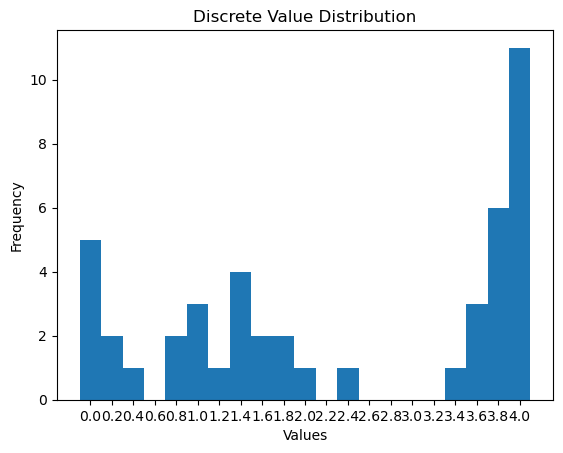

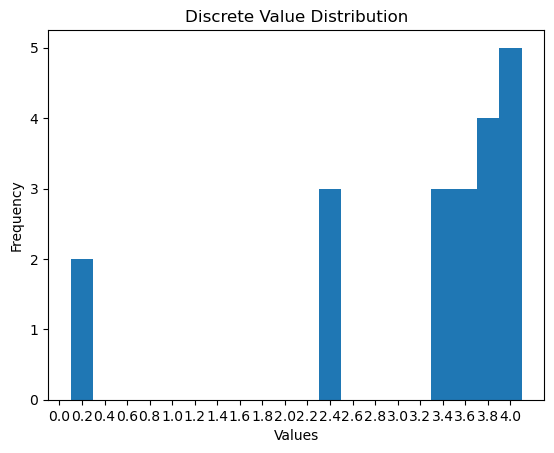

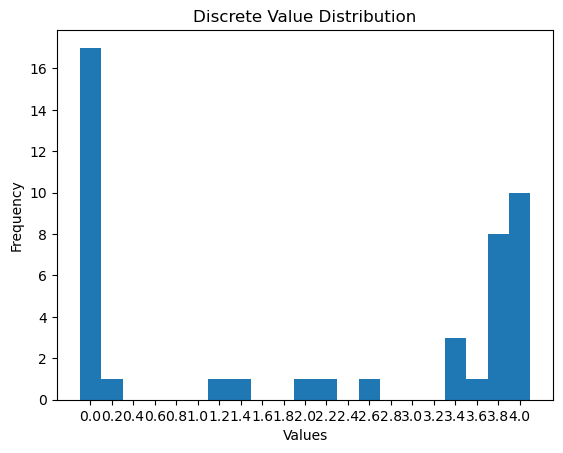

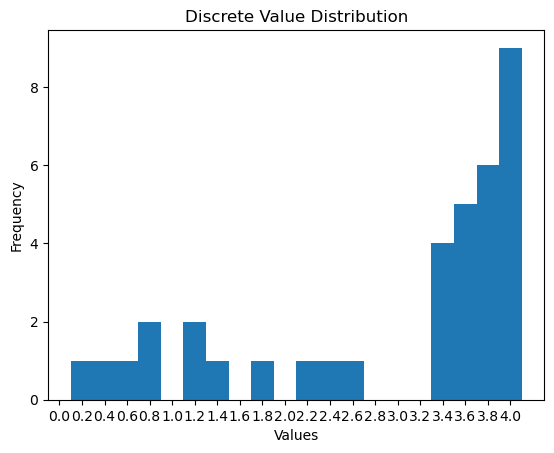

In [6]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)

In [13]:
for p in range(4):
    print(len(per_patient_worst[p]))

14
12
4
14


In [3]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'ED_CNN', 'pretrain': 'None'})
model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'ED_CNN_epoch_174_alldata.pth'), map_location="cpu"), strict=True)
model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


validation:   0%|          | 5/1000 [00:00<01:04, 15.53it/s]

pred: [2.6814942]
true: 2.8
#
pred: [1.7936195]
true: 1.8
#
pred: [3.261887]
true: 3.4
#
pred: [2.1627812]
true: 2.0
#
pred: [1.8311859]
true: 2.0
#
pred: [0.5498728]
true: 0.2
#
pred: [0.15346123]
true: 0.6
#


validation:   1%|          | 11/1000 [00:00<00:43, 22.82it/s]

pred: [3.6460881]
true: 4.0
#
pred: [0.2645874]
true: 0.0
#
pred: [1.7604952]
true: 1.6
#
pred: [3.8601398]
true: 4.0
#
pred: [2.3663778]
true: 2.2
#
pred: [0.7609234]
true: 0.6
#


validation:   2%|▏         | 20/1000 [00:00<00:35, 27.42it/s]

pred: [2.5847144]
true: 2.4
#
pred: [1.4809742]
true: 1.2
#
pred: [3.5684536]
true: 4.0
#
pred: [2.0954351]
true: 2.0
#
pred: [0.3818647]
true: 0.6
#
pred: [1.3467507]
true: 1.4
#
pred: [3.3213673]
true: 3.6
#


validation:   3%|▎         | 26/1000 [00:01<00:34, 28.19it/s]

pred: [1.6245238]
true: 1.6
#
pred: [0.14408842]
true: 0.2
#
pred: [3.682888]
true: 3.8
#
pred: [2.5858805]
true: 2.2
#
pred: [0.8198349]
true: 1.0
#
pred: [3.5593648]
true: 3.8
#
pred: [0.8315874]
true: 1.4
#


validation:   3%|▎         | 32/1000 [00:01<00:34, 28.37it/s]

pred: [2.2240963]
true: 2.2
#
pred: [2.100327]
true: 2.2
#
pred: [0.22963455]
true: 0.4
#
pred: [3.1444397]
true: 3.2
#
pred: [1.9803156]
true: 1.8
#
pred: [1.5903594]
true: 1.8
#


validation:   4%|▍         | 38/1000 [00:01<00:33, 28.86it/s]

pred: [0.79941314]
true: 0.8
#
pred: [1.2850055]
true: 1.6
#
pred: [0.97623694]
true: 1.4
#
pred: [0.83032143]
true: 1.0
#
pred: [3.7217023]
true: 4.0
#
pred: [0.9741124]
true: 1.0
#
pred: [1.6623676]
true: 1.8
#


validation:   4%|▍         | 44/1000 [00:01<00:33, 28.92it/s]

pred: [1.9251491]
true: 1.6
#
pred: [2.8191288]
true: 2.8
#
pred: [3.2432902]
true: 3.2
#
pred: [3.092254]
true: 3.4
#
pred: [2.0677898]
true: 1.8
#
pred: [1.9455851]
true: 1.4
#


validation:   5%|▌         | 51/1000 [00:01<00:32, 29.42it/s]

pred: [0.7813336]
true: 0.6
#
pred: [1.5081967]
true: 1.4
#
pred: [2.5482352]
true: 2.4
#
pred: [2.9998806]
true: 2.8
#
pred: [1.7292325]
true: 1.8
#
pred: [2.7662926]
true: 2.6
#


validation:   6%|▌         | 57/1000 [00:02<00:32, 29.07it/s]

pred: [2.4876022]
true: 2.4
#
pred: [3.3767586]
true: 3.2
#
pred: [1.8367275]
true: 1.6
#
pred: [3.1119964]
true: 3.2
#
pred: [2.307566]
true: 2.2
#
pred: [0.9127672]
true: 1.4
#
pred: [1.8447529]
true: 1.4
#


validation:   6%|▋         | 64/1000 [00:02<00:32, 29.00it/s]

pred: [3.27479]
true: 3.4
#
pred: [2.2157662]
true: 2.0
#
pred: [0.70756906]
true: 0.6
#
pred: [1.2733777]
true: 1.2
#
pred: [2.0158443]
true: 1.8
#
pred: [2.6352758]
true: 2.6
#


validation:   7%|▋         | 70/1000 [00:02<00:31, 29.08it/s]

pred: [3.3609922]
true: 3.0
#
pred: [1.9130216]
true: 2.0
#
pred: [0.64686567]
true: 0.8
#
pred: [2.1997144]
true: 2.4
#
pred: [2.7995985]
true: 2.6
#
pred: [3.828337]
true: 3.8
#
pred: [1.4562212]
true: 1.4
#


validation:   8%|▊         | 79/1000 [00:02<00:31, 29.14it/s]

pred: [2.602861]
true: 2.6
#
pred: [0.8541727]
true: 0.4
#
pred: [1.8175896]
true: 1.4
#
pred: [0.6371572]
true: 0.0
#
pred: [2.8747244]
true: 2.6
#
pred: [2.5818748]
true: 2.4
#
pred: [2.7832813]
true: 3.0
#


validation:   8%|▊         | 85/1000 [00:03<00:31, 29.10it/s]

pred: [0.8988645]
true: 1.2
#
pred: [0.37690097]
true: 0.4
#
pred: [0.26681325]
true: 0.2
#
pred: [3.3373039]
true: 3.6
#
pred: [1.699308]
true: 1.4
#
pred: [2.7240946]
true: 2.4
#
pred: [3.216524]
true: 3.6
#


validation:   9%|▉         | 91/1000 [00:03<00:31, 29.11it/s]

pred: [3.190678]
true: 3.0
#
pred: [3.0668733]
true: 3.0
#
pred: [2.630556]
true: 2.8
#
pred: [3.1489177]
true: 3.0
#
pred: [1.0877166]
true: 1.2
#
pred: [3.748303]
true: 3.6
#


validation:  10%|▉         | 97/1000 [00:03<00:31, 28.94it/s]

pred: [1.8095185]
true: 1.4
#
pred: [2.4221416]
true: 2.6
#
pred: [0.22031812]
true: 0.2
#
pred: [0.9134187]
true: 0.8
#
pred: [1.445744]
true: 2.0
#
pred: [3.9246745]
true: 4.0
#


validation:  10%|█         | 104/1000 [00:03<00:30, 29.51it/s]

pred: [1.2789736]
true: 1.8
#
pred: [3.243289]
true: 3.0
#
pred: [3.6585336]
true: 4.0
#
pred: [3.5524783]
true: 4.0
#
pred: [3.2480693]
true: 3.6
#
pred: [3.2986705]
true: 3.0
#
pred: [1.9437354]
true: 1.8
#


validation:  11%|█         | 110/1000 [00:03<00:30, 29.31it/s]

pred: [1.1992142]
true: 1.4
#
pred: [2.8871903]
true: 3.0
#
pred: [1.1408836]
true: 0.8
#
pred: [3.8085485]
true: 4.0
#
pred: [1.9912248]
true: 2.0
#
pred: [3.1016583]
true: 3.0
#
pred: [0.23636535]
true: 0.2
#


validation:  12%|█▏        | 117/1000 [00:04<00:29, 29.48it/s]

pred: [0.6347875]
true: 1.2
#
pred: [1.7129852]
true: 1.8
#
pred: [2.9264343]
true: 3.0
#
pred: [1.0049772]
true: 0.8
#
pred: [2.5184994]
true: 2.4
#
pred: [1.5019085]
true: 1.2
#


validation:  12%|█▏        | 124/1000 [00:04<00:29, 29.47it/s]

pred: [3.148369]
true: 3.0
#
pred: [0.26478907]
true: 0.2
#
pred: [1.836861]
true: 2.2
#
pred: [3.4653563]
true: 3.6
#
pred: [3.7508407]
true: 4.0
#
pred: [2.6432908]
true: 2.6
#
pred: [0.85456914]
true: 1.4
#


validation:  13%|█▎        | 131/1000 [00:04<00:28, 30.58it/s]

pred: [2.0365658]
true: 2.4
#
pred: [1.6697801]
true: 1.6
#
pred: [0.5334722]
true: 0.4
#
pred: [3.933906]
true: 3.8
#
pred: [0.98350924]
true: 1.0
#
pred: [1.9823736]
true: 2.0
#


validation:  14%|█▎        | 135/1000 [00:04<00:29, 29.26it/s]

pred: [3.406181]
true: 3.4
#
pred: [1.9819652]
true: 2.2
#
pred: [2.9103541]
true: 2.8
#
pred: [2.0918825]
true: 2.0
#
pred: [0.9121718]
true: 1.0
#
pred: [3.3253617]
true: 3.0
#


validation:  14%|█▍        | 144/1000 [00:05<00:29, 29.18it/s]

pred: [1.0955673]
true: 0.8
#
pred: [1.3908863]
true: 2.0
#
pred: [0.71356165]
true: 1.0
#
pred: [2.4174347]
true: 2.4
#
pred: [1.507899]
true: 1.8
#
pred: [1.2448918]
true: 1.2
#
pred: [2.36843]
true: 2.6
#


validation:  15%|█▍        | 148/1000 [00:05<00:28, 29.48it/s]

pred: [1.5228164]
true: 1.2
#
pred: [1.8309635]
true: 1.8
#
pred: [3.3371062]
true: 3.4
#
pred: [1.4612554]
true: 1.2
#
pred: [0.5297782]
true: 0.4
#
pred: [2.5798638]
true: 2.6
#
pred: [0.57493246]
true: 0.4
#


validation:  16%|█▌        | 155/1000 [00:05<00:28, 29.41it/s]

pred: [2.726032]
true: 2.6
#
pred: [2.6255505]
true: 2.6
#
pred: [1.8584049]
true: 2.0
#
pred: [3.391977]
true: 3.0
#
pred: [1.8376311]
true: 2.0
#
pred: [2.600806]
true: 2.6
#


validation:  16%|█▋        | 164/1000 [00:05<00:28, 29.41it/s]

pred: [2.8600109]
true: 2.6
#
pred: [3.1370628]
true: 3.6
#
pred: [2.7344003]
true: 2.6
#
pred: [0.34180096]
true: 0.6
#
pred: [2.6708126]
true: 2.4
#
pred: [3.0433052]
true: 3.2
#
pred: [3.6969543]
true: 3.8
#


validation:  17%|█▋        | 170/1000 [00:06<00:28, 29.32it/s]

pred: [2.9750001]
true: 2.4
#
pred: [1.5371417]
true: 1.4
#
pred: [3.776784]
true: 4.0
#
pred: [3.1657314]
true: 3.0
#
pred: [1.5985837]
true: 1.6
#
pred: [2.4365604]
true: 2.4
#


validation:  18%|█▊        | 176/1000 [00:06<00:28, 29.24it/s]

pred: [1.6283157]
true: 1.6
#
pred: [3.448232]
true: 3.8
#
pred: [2.1998084]
true: 2.6
#
pred: [2.7626953]
true: 2.6
#
pred: [1.0207144]
true: 1.0
#
pred: [2.041582]
true: 2.2
#
pred: [2.5477133]
true: 2.4
#


validation:  18%|█▊        | 182/1000 [00:06<00:27, 29.27it/s]

pred: [3.7727454]
true: 3.8
#
pred: [1.2267919]
true: 1.4
#
pred: [1.549555]
true: 1.0
#
pred: [3.78568]
true: 4.0
#
pred: [1.3788692]
true: 1.4
#
pred: [0.64978236]
true: 1.0
#


validation:  19%|█▉        | 188/1000 [00:06<00:27, 29.34it/s]

pred: [0.76886374]
true: 0.6
#
pred: [0.8906331]
true: 1.2
#
pred: [1.7708925]
true: 2.2
#
pred: [2.6800222]
true: 2.6
#
pred: [0.21570729]
true: 0.0
#
pred: [0.10843042]
true: 0.0
#
pred: [3.5484052]
true: 3.0
#


validation:  20%|█▉        | 195/1000 [00:06<00:26, 29.88it/s]

pred: [3.047963]
true: 2.6
#
pred: [0.54275155]
true: 0.8
#
pred: [3.709082]
true: 3.4
#
pred: [2.2324877]
true: 1.6
#
pred: [1.5854532]
true: 1.6
#
pred: [2.6018972]
true: 2.4
#
pred: [3.23494]
true: 3.6
#


validation:  20%|██        | 201/1000 [00:07<00:27, 28.91it/s]

pred: [1.4413633]
true: 1.8
#
pred: [1.586754]
true: 1.2
#
pred: [2.0746167]
true: 2.2
#
pred: [2.9502397]
true: 2.4
#
pred: [1.855364]
true: 1.8
#
pred: [1.4601923]
true: 1.6
#


validation:  21%|██        | 210/1000 [00:07<00:27, 29.15it/s]

pred: [2.441782]
true: 2.6
#
pred: [1.9359766]
true: 2.0
#
pred: [2.8363056]
true: 2.8
#
pred: [2.9389803]
true: 2.6
#
pred: [3.2971632]
true: 3.0
#
pred: [0.1737701]
true: 0.0
#
pred: [1.467816]
true: 1.6
#


validation:  22%|██▏       | 216/1000 [00:07<00:27, 29.03it/s]

pred: [1.7461644]
true: 1.6
#
pred: [0.94587904]
true: 1.0
#
pred: [0.32945758]
true: 0.4
#
pred: [0.9741687]
true: 0.8
#
pred: [3.2127378]
true: 3.2
#
pred: [3.8801134]
true: 3.8
#


validation:  22%|██▏       | 222/1000 [00:07<00:26, 29.33it/s]

pred: [3.3180618]
true: 3.4
#
pred: [2.5847223]
true: 3.0
#
pred: [2.5762815]
true: 2.4
#
pred: [0.8520777]
true: 0.6
#
pred: [2.2803066]
true: 2.0
#
pred: [3.3975325]
true: 3.0
#
pred: [1.3539097]
true: 1.4
#


validation:  23%|██▎       | 228/1000 [00:08<00:26, 29.17it/s]

pred: [2.0778527]
true: 1.6
#
pred: [2.126571]
true: 1.8
#
pred: [2.0894501]
true: 1.8
#
pred: [2.2543328]
true: 2.4
#
pred: [0.6835508]
true: 0.8
#
pred: [0.8720182]
true: 0.8
#
pred: [3.348564]
true: 3.6
#


validation:  24%|██▎       | 235/1000 [00:08<00:26, 29.10it/s]

pred: [3.254258]
true: 3.4
#
pred: [0.65370905]
true: 0.8
#
pred: [3.777243]
true: 4.0
#
pred: [3.4625297]
true: 3.4
#
pred: [1.9445883]
true: 2.0
#
pred: [0.48274395]
true: 0.2
#


validation:  24%|██▍       | 241/1000 [00:08<00:26, 28.93it/s]

pred: [1.7635897]
true: 1.8
#
pred: [1.7355782]
true: 2.2
#
pred: [3.159806]
true: 3.6
#
pred: [0.77156335]
true: 0.8
#
pred: [1.5999283]
true: 1.4
#
pred: [1.7344047]
true: 1.8
#
pred: [2.6843665]
true: 2.8
#


validation:  25%|██▍       | 248/1000 [00:08<00:25, 29.33it/s]

pred: [1.6923238]
true: 1.4
#
pred: [1.8606371]
true: 2.0
#
pred: [1.2371842]
true: 1.8
#
pred: [3.0857015]
true: 3.0
#
pred: [2.9732866]
true: 3.6
#
pred: [1.33171]
true: 1.2
#


validation:  25%|██▌       | 254/1000 [00:08<00:25, 29.37it/s]

pred: [1.9826496]
true: 1.8
#
pred: [1.179718]
true: 1.2
#
pred: [3.2352304]
true: 3.2
#
pred: [0.24060774]
true: 0.2
#
pred: [0.89369327]
true: 1.0
#
pred: [2.626995]
true: 2.6
#


validation:  26%|██▌       | 260/1000 [00:09<00:25, 29.12it/s]

pred: [2.016641]
true: 2.4
#
pred: [1.0005248]
true: 0.8
#
pred: [1.1237835]
true: 1.0
#
pred: [3.217304]
true: 3.6
#
pred: [0.6812591]
true: 0.8
#
pred: [3.1957295]
true: 3.4
#
pred: [3.503786]
true: 3.6
#


validation:  27%|██▋       | 267/1000 [00:09<00:25, 28.90it/s]

pred: [1.0532978]
true: 1.0
#
pred: [1.8675307]
true: 1.6
#
pred: [1.0095831]
true: 1.0
#
pred: [2.2579105]
true: 1.8
#
pred: [0.10137946]
true: 0.0
#
pred: [2.4364712]
true: 2.2
#


validation:  27%|██▋       | 274/1000 [00:09<00:24, 29.16it/s]

pred: [2.1388843]
true: 1.4
#
pred: [2.1357236]
true: 2.2
#
pred: [2.8125925]
true: 3.0
#
pred: [3.6942182]
true: 3.8
#
pred: [1.6649227]
true: 1.2
#
pred: [1.4337783]
true: 1.6
#
pred: [2.37573]
true: 2.6
#


validation:  28%|██▊       | 281/1000 [00:09<00:24, 29.54it/s]

pred: [3.2111812]
true: 3.4
#
pred: [1.9582006]
true: 1.6
#
pred: [2.0632007]
true: 2.0
#
pred: [3.9350317]
true: 4.0
#
pred: [3.1256888]
true: 3.4
#
pred: [3.3975432]
true: 3.8
#
pred: [0.14677694]
true: 0.0
#


validation:  29%|██▊       | 287/1000 [00:10<00:24, 29.33it/s]

pred: [0.53239]
true: 0.6
#
pred: [1.7535251]
true: 1.2
#
pred: [2.1178563]
true: 2.4
#
pred: [0.93029976]
true: 1.0
#
pred: [3.8882852]
true: 3.8
#
pred: [1.8257017]
true: 2.0
#
pred: [1.6626102]
true: 2.4
#


validation:  29%|██▉       | 293/1000 [00:10<00:24, 29.30it/s]

pred: [3.227314]
true: 3.4
#
pred: [2.6042397]
true: 2.2
#
pred: [3.7882535]
true: 3.6
#
pred: [2.7950532]
true: 2.8
#
pred: [3.7028735]
true: 3.8
#
pred: [0.23701882]
true: 0.0
#


validation:  30%|██▉       | 299/1000 [00:10<00:24, 29.04it/s]

pred: [1.0601815]
true: 0.8
#
pred: [0.79701805]
true: 1.0
#
pred: [1.8178786]
true: 1.4
#
pred: [3.347288]
true: 3.0
#
pred: [2.6967688]
true: 2.8
#
pred: [2.4886384]
true: 2.4
#


validation:  31%|███       | 308/1000 [00:10<00:23, 29.35it/s]

pred: [1.6820984]
true: 1.4
#
pred: [3.088994]
true: 3.2
#
pred: [1.3199131]
true: 1.8
#
pred: [3.858352]
true: 4.0
#
pred: [2.6228395]
true: 2.8
#
pred: [0.8966606]
true: 0.8
#
pred: [3.3330142]
true: 3.4
#


validation:  31%|███▏      | 314/1000 [00:10<00:23, 28.93it/s]

pred: [1.6445411]
true: 1.8
#
pred: [1.8886362]
true: 2.4
#
pred: [3.0974147]
true: 3.0
#
pred: [3.1550968]
true: 2.6
#
pred: [3.8753152]
true: 4.0
#
pred: [2.3948536]
true: 2.4
#


validation:  32%|███▏      | 320/1000 [00:11<00:23, 29.16it/s]

pred: [0.17114632]
true: 0.0
#
pred: [2.0860946]
true: 2.0
#
pred: [3.7062767]
true: 3.8
#
pred: [1.8605185]
true: 1.4
#
pred: [3.6180112]
true: 3.4
#
pred: [1.6207228]
true: 1.6
#
pred: [0.9655424]
true: 0.8
#


validation:  32%|███▏      | 324/1000 [00:11<00:22, 29.60it/s]

pred: [0.6846742]
true: 1.0
#
pred: [2.366687]
true: 2.4
#
pred: [1.8835232]
true: 2.2
#
pred: [1.4558026]
true: 1.6
#
pred: [3.0406742]
true: 3.0
#
pred: [1.7226882]
true: 1.8
#


validation:  33%|███▎      | 331/1000 [00:11<00:22, 29.56it/s]

pred: [0.9277303]
true: 1.0
#
pred: [2.0624194]
true: 2.2
#
pred: [0.21559896]
true: 0.2
#
pred: [0.66618407]
true: 1.0
#
pred: [3.8882515]
true: 4.0
#
pred: [0.6771591]
true: 0.6
#


validation:  34%|███▍      | 338/1000 [00:11<00:22, 29.63it/s]

pred: [1.4640973]
true: 1.0
#
pred: [2.4190023]
true: 2.6
#
pred: [0.8035566]
true: 0.8
#
pred: [2.5394557]
true: 2.0
#
pred: [3.4318633]
true: 3.6
#
pred: [3.3068526]
true: 3.4
#
pred: [2.3290043]
true: 2.0
#


validation:  35%|███▍      | 347/1000 [00:12<00:22, 29.23it/s]

pred: [2.6908484]
true: 2.8
#
pred: [2.549626]
true: 2.2
#
pred: [3.556315]
true: 3.8
#
pred: [0.17247078]
true: 0.2
#
pred: [3.7271414]
true: 4.0
#
pred: [1.687405]
true: 1.8
#
pred: [3.2225916]
true: 3.6
#


validation:  35%|███▌      | 353/1000 [00:12<00:22, 29.22it/s]

pred: [1.7238272]
true: 1.8
#
pred: [2.565533]
true: 3.0
#
pred: [1.995929]
true: 2.2
#
pred: [3.6934216]
true: 3.6
#
pred: [1.391741]
true: 1.0
#
pred: [2.811237]
true: 3.0
#
pred: [3.6681702]
true: 3.8
#


validation:  36%|███▌      | 360/1000 [00:12<00:21, 29.46it/s]

pred: [2.1895428]
true: 2.2
#
pred: [2.0550861]
true: 2.2
#
pred: [0.9298949]
true: 1.0
#
pred: [1.7848334]
true: 1.8
#
pred: [0.537486]
true: 0.4
#
pred: [1.3739228]
true: 1.6
#
pred: [2.89306]
true: 3.0
#


validation:  37%|███▋      | 366/1000 [00:12<00:21, 29.49it/s]

pred: [2.1178386]
true: 2.2
#
pred: [3.793213]
true: 3.6
#
pred: [0.6807098]
true: 0.6
#
pred: [1.8733386]
true: 2.4
#
pred: [2.7235942]
true: 2.8
#
pred: [2.4708643]
true: 2.4
#
pred: [0.86794835]
true: 0.6
#


validation:  37%|███▋      | 372/1000 [00:12<00:21, 29.15it/s]

pred: [1.1527023]
true: 1.2
#
pred: [1.1456245]
true: 1.0
#
pred: [0.12018936]
true: 0.0
#
pred: [1.9155545]
true: 1.4
#
pred: [2.7191608]
true: 2.6
#
pred: [1.667782]
true: 1.8
#
pred: [1.6783454]
true: 0.8
#


validation:  38%|███▊      | 379/1000 [00:13<00:21, 28.92it/s]

pred: [1.0680093]
true: 1.4
#
pred: [0.5521352]
true: 0.4
#
pred: [0.19859403]
true: 0.2
#
pred: [1.7581882]
true: 1.6
#
pred: [3.2252307]
true: 3.2
#
pred: [0.7563187]
true: 0.6
#


validation:  38%|███▊      | 385/1000 [00:13<00:20, 29.29it/s]

pred: [1.9261817]
true: 1.6
#
pred: [3.3911357]
true: 3.6
#
pred: [0.48437232]
true: 1.0
#
pred: [1.1113111]
true: 1.6
#
pred: [2.942493]
true: 3.0
#
pred: [1.8686898]
true: 2.2
#


validation:  39%|███▉      | 392/1000 [00:13<00:20, 29.39it/s]

pred: [1.3625906]
true: 1.4
#
pred: [1.2094573]
true: 0.8
#
pred: [0.75528604]
true: 1.2
#
pred: [1.2201272]
true: 1.4
#
pred: [2.6125283]
true: 2.4
#
pred: [0.41426685]
true: 0.4
#
pred: [2.821428]
true: 2.6
#


validation:  40%|███▉      | 398/1000 [00:13<00:20, 28.99it/s]

pred: [3.3348157]
true: 3.4
#
pred: [1.762679]
true: 2.0
#
pred: [3.2193484]
true: 3.2
#
pred: [3.9403403]
true: 3.8
#
pred: [3.906837]
true: 4.0
#
pred: [1.3604721]
true: 1.6
#


validation:  40%|████      | 405/1000 [00:14<00:20, 29.02it/s]

pred: [2.8382509]
true: 3.4
#
pred: [0.8006741]
true: 1.2
#
pred: [1.8485756]
true: 1.8
#
pred: [1.0019537]
true: 0.8
#
pred: [0.11932403]
true: 0.0
#
pred: [1.964114]
true: 2.0
#


validation:  41%|████      | 411/1000 [00:14<00:20, 29.12it/s]

pred: [2.1175761]
true: 2.0
#
pred: [2.2356167]
true: 2.0
#
pred: [3.8820558]
true: 4.0
#
pred: [3.8795848]
true: 3.8
#
pred: [0.96048546]
true: 1.0
#
pred: [2.682561]
true: 2.8
#
pred: [3.9190006]
true: 4.0
#


validation:  42%|████▏     | 418/1000 [00:14<00:19, 29.38it/s]

pred: [1.6343784]
true: 1.6
#
pred: [2.1163282]
true: 2.0
#
pred: [0.48446223]
true: 0.4
#
pred: [3.256088]
true: 3.2
#
pred: [3.137355]
true: 3.6
#
pred: [2.3836145]
true: 2.6
#
pred: [0.7299496]
true: 0.6
#


validation:  42%|████▎     | 425/1000 [00:14<00:19, 29.45it/s]

pred: [3.7881846]
true: 4.0
#
pred: [1.7455986]
true: 1.6
#
pred: [3.7272696]
true: 3.8
#
pred: [0.800345]
true: 1.0
#
pred: [0.9207099]
true: 0.6
#
pred: [1.0030775]
true: 1.0
#
pred: [3.0561197]
true: 3.0
#


validation:  43%|████▎     | 431/1000 [00:14<00:19, 29.04it/s]

pred: [0.79048276]
true: 0.8
#
pred: [1.2578187]
true: 1.6
#
pred: [1.6279771]
true: 1.6
#
pred: [3.287042]
true: 3.2
#
pred: [3.3489056]
true: 3.2
#
pred: [2.5664167]
true: 2.4
#


validation:  44%|████▍     | 439/1000 [00:15<00:18, 29.78it/s]

pred: [2.2574954]
true: 2.0
#
pred: [2.7940798]
true: 2.8
#
pred: [3.1400108]
true: 3.2
#
pred: [1.716177]
true: 2.0
#
pred: [1.2533185]
true: 1.0
#
pred: [2.255795]
true: 2.2
#


validation:  44%|████▍     | 445/1000 [00:15<00:18, 29.47it/s]

pred: [1.789304]
true: 1.4
#
pred: [0.10026205]
true: 0.0
#
pred: [2.7170453]
true: 2.8
#
pred: [1.3992548]
true: 1.2
#
pred: [1.9877917]
true: 1.4
#
pred: [1.6014335]
true: 1.2
#
pred: [0.16846333]
true: 0.4
#


validation:  45%|████▌     | 452/1000 [00:15<00:18, 29.70it/s]

pred: [1.7719871]
true: 2.0
#
pred: [0.6350319]
true: 0.6
#
pred: [1.8659208]
true: 2.2
#
pred: [1.8813562]
true: 1.4
#
pred: [3.211906]
true: 3.0
#
pred: [3.2537134]
true: 3.4
#
pred: [1.9283168]
true: 1.6
#


validation:  46%|████▌     | 458/1000 [00:15<00:18, 29.60it/s]

pred: [1.9628742]
true: 2.4
#
pred: [1.6729697]
true: 1.6
#
pred: [2.3256032]
true: 2.2
#
pred: [3.6969986]
true: 3.8
#
pred: [1.8464981]
true: 1.6
#
pred: [1.3580017]
true: 1.6
#


validation:  46%|████▋     | 464/1000 [00:16<00:18, 29.03it/s]

pred: [3.3196948]
true: 3.2
#
pred: [2.6464505]
true: 2.6
#
pred: [1.093848]
true: 1.4
#
pred: [3.20117]
true: 3.4
#
pred: [2.131665]
true: 2.6
#
pred: [1.8884176]
true: 2.0
#


validation:  47%|████▋     | 471/1000 [00:16<00:18, 29.36it/s]

pred: [2.382615]
true: 2.6
#
pred: [1.7582042]
true: 1.6
#
pred: [1.7469581]
true: 2.2
#
pred: [0.4083489]
true: 0.2
#
pred: [0.21864125]
true: 0.0
#
pred: [0.88630676]
true: 0.8
#
pred: [1.3729541]
true: 1.6
#


validation:  48%|████▊     | 477/1000 [00:16<00:17, 29.18it/s]

pred: [3.2896502]
true: 3.0
#
pred: [1.1862081]
true: 1.2
#
pred: [2.4319112]
true: 2.2
#
pred: [0.2559579]
true: 0.4
#
pred: [2.61836]
true: 2.8
#
pred: [2.5675175]
true: 2.2
#


validation:  48%|████▊     | 484/1000 [00:16<00:17, 29.53it/s]

pred: [3.7118354]
true: 3.6
#
pred: [2.9779363]
true: 2.8
#
pred: [2.7238982]
true: 2.6
#
pred: [1.2337744]
true: 1.0
#
pred: [3.8470435]
true: 4.0
#
pred: [2.7390137]
true: 2.6
#
pred: [0.12843023]
true: 0.6
#


validation:  49%|████▉     | 490/1000 [00:16<00:17, 29.58it/s]

pred: [1.6603016]
true: 1.4
#
pred: [1.7688556]
true: 1.8
#
pred: [1.8591971]
true: 1.8
#
pred: [3.5937402]
true: 4.0
#
pred: [0.56543744]
true: 0.8
#
pred: [2.586294]
true: 2.4
#


validation:  50%|████▉     | 498/1000 [00:17<00:16, 30.74it/s]

pred: [3.4211984]
true: 3.4
#
pred: [1.1745278]
true: 1.0
#
pred: [3.8391]
true: 4.0
#
pred: [3.6579316]
true: 3.8
#
pred: [2.6864426]
true: 2.2
#
pred: [0.30850953]
true: 0.2
#
pred: [2.8160248]
true: 3.0
#


validation:  51%|█████     | 506/1000 [00:17<00:15, 32.30it/s]

pred: [2.7732813]
true: 2.6
#
pred: [1.9720758]
true: 2.4
#
pred: [2.6285071]
true: 2.8
#
pred: [3.884849]
true: 3.8
#
pred: [1.26929]
true: 1.4
#
pred: [3.8141263]
true: 4.0
#
pred: [2.90614]
true: 3.0
#
pred: [2.8837519]
true: 3.0
#


validation:  51%|█████▏    | 514/1000 [00:17<00:14, 33.61it/s]

pred: [0.91705346]
true: 0.8
#
pred: [2.278263]
true: 2.2
#
pred: [3.2713413]
true: 3.4
#
pred: [2.5137727]
true: 2.6
#
pred: [0.928334]
true: 1.0
#
pred: [1.2054442]
true: 1.0
#
pred: [3.5758393]
true: 3.8
#
pred: [2.2518554]
true: 2.2
#


validation:  52%|█████▏    | 518/1000 [00:17<00:14, 34.12it/s]

pred: [3.85647]
true: 3.8
#
pred: [3.0787368]
true: 3.4
#
pred: [2.2881591]
true: 2.2
#
pred: [3.925764]
true: 3.8
#
pred: [0.9533209]
true: 1.2
#
pred: [1.8799134]
true: 1.8
#
pred: [1.6945361]
true: 1.6
#


validation:  53%|█████▎    | 526/1000 [00:18<00:13, 34.37it/s]

pred: [3.2013488]
true: 3.0
#
pred: [2.6034286]
true: 2.8
#
pred: [0.3387405]
true: 0.4
#
pred: [0.14574397]
true: 0.0
#
pred: [3.6277437]
true: 3.4
#
pred: [1.2265985]
true: 1.2
#
pred: [1.8142469]
true: 1.6
#
pred: [1.5730449]
true: 1.4
#


validation:  53%|█████▎    | 534/1000 [00:18<00:13, 34.49it/s]

pred: [1.9245952]
true: 2.0
#
pred: [2.7508874]
true: 2.8
#
pred: [1.5002098]
true: 1.6
#
pred: [1.1855822]
true: 1.4
#
pred: [2.085617]
true: 2.4
#
pred: [1.7811432]
true: 1.6
#
pred: [1.8885112]
true: 2.6
#
pred: [3.8312652]
true: 3.8
#


validation:  54%|█████▍    | 542/1000 [00:18<00:13, 33.37it/s]

pred: [1.5907626]
true: 1.8
#
pred: [1.736867]
true: 2.0
#
pred: [2.9626377]
true: 3.0
#
pred: [3.3511465]
true: 3.4
#
pred: [1.6878406]
true: 1.8
#
pred: [3.846524]
true: 3.8
#
pred: [1.1663908]
true: 1.4
#


validation:  55%|█████▌    | 550/1000 [00:18<00:13, 33.10it/s]

pred: [3.455666]
true: 3.4
#
pred: [2.5916939]
true: 2.6
#
pred: [3.5510316]
true: 3.8
#
pred: [1.7768085]
true: 1.6
#
pred: [2.5790756]
true: 2.6
#
pred: [3.0337691]
true: 2.8
#
pred: [2.4205737]
true: 2.6
#


validation:  56%|█████▌    | 558/1000 [00:18<00:13, 33.06it/s]

pred: [3.1052308]
true: 3.4
#
pred: [2.5905797]
true: 2.8
#
pred: [2.2969003]
true: 2.0
#
pred: [3.1032383]
true: 3.2
#
pred: [1.9236238]
true: 2.0
#
pred: [3.0820467]
true: 2.6
#
pred: [3.143994]
true: 3.0
#


validation:  57%|█████▋    | 566/1000 [00:19<00:13, 33.14it/s]

pred: [3.2864285]
true: 2.8
#
pred: [3.7499676]
true: 3.8
#
pred: [1.9448471]
true: 2.4
#
pred: [3.138968]
true: 3.2
#
pred: [1.5562843]
true: 1.4
#
pred: [3.3299422]
true: 3.6
#
pred: [1.8725879]
true: 2.0
#
pred: [3.283979]
true: 3.2
#


validation:  57%|█████▋    | 570/1000 [00:19<00:12, 33.40it/s]

pred: [1.4645834]
true: 1.2
#
pred: [2.695162]
true: 2.6
#
pred: [2.7936823]
true: 2.6
#
pred: [1.9202161]
true: 2.0
#
pred: [2.4143517]
true: 2.2
#
pred: [2.692148]
true: 2.4
#
pred: [3.0748944]
true: 3.4
#


validation:  58%|█████▊    | 578/1000 [00:19<00:12, 33.31it/s]

pred: [1.2000983]
true: 1.0
#
pred: [2.8877816]
true: 2.6
#
pred: [1.5118082]
true: 1.6
#
pred: [0.45320436]
true: 0.8
#
pred: [2.3897412]
true: 2.2
#
pred: [1.457187]
true: 1.2
#
pred: [2.3141572]
true: 2.4
#
pred: [1.0119443]
true: 1.2
#


validation:  59%|█████▊    | 586/1000 [00:19<00:12, 33.51it/s]

pred: [2.085373]
true: 1.8
#
pred: [1.7910148]
true: 1.4
#
pred: [2.9209921]
true: 3.0
#
pred: [1.8865452]
true: 2.0
#
pred: [3.2377963]
true: 3.0
#
pred: [1.3446764]
true: 1.8
#
pred: [1.5283046]
true: 1.2
#


validation:  59%|█████▉    | 594/1000 [00:20<00:12, 33.37it/s]

pred: [1.2786343]
true: 1.6
#
pred: [2.3816743]
true: 2.4
#
pred: [1.6263611]
true: 1.6
#
pred: [0.67195714]
true: 0.8
#
pred: [3.0239336]
true: 3.2
#
pred: [2.6313546]
true: 2.2
#
pred: [0.91317976]
true: 0.8
#
pred: [2.933004]
true: 2.8
#


validation:  60%|██████    | 602/1000 [00:20<00:12, 32.64it/s]

pred: [1.5753766]
true: 1.4
#
pred: [1.0055678]
true: 1.2
#
pred: [1.2487403]
true: 1.2
#
pred: [2.4422293]
true: 2.6
#
pred: [0.87715024]
true: 0.8
#
pred: [1.0974749]
true: 1.2
#
pred: [1.1221577]
true: 1.0
#


validation:  61%|██████    | 610/1000 [00:20<00:11, 33.03it/s]

pred: [0.893232]
true: 0.8
#
pred: [1.7124788]
true: 1.6
#
pred: [0.87301415]
true: 0.4
#
pred: [2.5646129]
true: 2.4
#
pred: [2.0924542]
true: 1.8
#
pred: [2.6208613]
true: 2.2
#
pred: [3.4198816]
true: 3.4
#
pred: [1.854112]
true: 2.0
#


validation:  62%|██████▏   | 618/1000 [00:20<00:11, 33.15it/s]

pred: [0.67128533]
true: 0.6
#
pred: [3.4517245]
true: 3.2
#
pred: [3.7119446]
true: 3.8
#
pred: [3.399354]
true: 3.0
#
pred: [3.1577663]
true: 3.4
#
pred: [1.5996739]
true: 2.0
#
pred: [0.77986175]
true: 1.0
#
pred: [3.3244498]
true: 3.0
#


validation:  63%|██████▎   | 626/1000 [00:21<00:11, 33.54it/s]

pred: [1.2284192]
true: 1.2
#
pred: [3.0577526]
true: 3.4
#
pred: [1.7654344]
true: 1.8
#
pred: [3.426957]
true: 3.8
#
pred: [2.6345947]
true: 2.4
#
pred: [1.6300678]
true: 1.6
#
pred: [0.8290061]
true: 1.0
#


validation:  63%|██████▎   | 630/1000 [00:21<00:10, 33.85it/s]

pred: [3.875813]
true: 3.8
#
pred: [1.208253]
true: 1.6
#
pred: [2.1558561]
true: 2.2
#
pred: [3.4850366]
true: 3.8
#
pred: [0.91439575]
true: 1.4
#
pred: [1.6518848]
true: 1.2
#
pred: [3.3935401]
true: 3.6
#


validation:  64%|██████▍   | 638/1000 [00:21<00:10, 34.02it/s]

pred: [2.871363]
true: 2.6
#
pred: [3.2846017]
true: 3.0
#
pred: [1.0777674]
true: 1.6
#
pred: [2.526802]
true: 2.4
#
pred: [1.5846258]
true: 1.2
#
pred: [0.89206344]
true: 1.0
#
pred: [3.194198]
true: 3.2
#
pred: [1.1242691]
true: 1.0
#


validation:  65%|██████▍   | 646/1000 [00:21<00:10, 34.26it/s]

pred: [3.390007]
true: 3.0
#
pred: [2.8260422]
true: 2.6
#
pred: [3.913513]
true: 3.8
#
pred: [3.05636]
true: 3.2
#
pred: [3.3075402]
true: 2.8
#
pred: [3.6963258]
true: 3.8
#
pred: [2.0627482]
true: 2.4
#
pred: [1.1427425]
true: 1.4
#


validation:  65%|██████▌   | 654/1000 [00:21<00:10, 34.17it/s]

pred: [0.9406836]
true: 0.8
#
pred: [2.765982]
true: 3.0
#
pred: [2.208694]
true: 2.0
#
pred: [1.9249494]
true: 1.8
#
pred: [1.5791712]
true: 1.8
#
pred: [2.2239177]
true: 1.4
#
pred: [3.189104]
true: 2.4
#


validation:  66%|██████▌   | 662/1000 [00:22<00:10, 33.52it/s]

pred: [2.9030845]
true: 2.6
#
pred: [0.7755923]
true: 0.6
#
pred: [0.6896704]
true: 1.0
#
pred: [3.333496]
true: 3.6
#
pred: [2.820925]
true: 2.8
#
pred: [1.2038275]
true: 1.4
#
pred: [2.065989]
true: 2.0
#
pred: [0.7041399]
true: 0.6
#


validation:  67%|██████▋   | 670/1000 [00:22<00:09, 33.34it/s]

pred: [2.4986827]
true: 2.6
#
pred: [1.0303307]
true: 1.0
#
pred: [0.33774254]
true: 0.0
#
pred: [1.1737883]
true: 0.6
#
pred: [2.094095]
true: 2.2
#
pred: [1.8442146]
true: 1.8
#
pred: [0.16504475]
true: 0.0
#


validation:  68%|██████▊   | 678/1000 [00:22<00:09, 33.26it/s]

pred: [0.9177816]
true: 1.0
#
pred: [1.3485473]
true: 1.0
#
pred: [1.1398766]
true: 1.2
#
pred: [0.550876]
true: 0.8
#
pred: [2.7444358]
true: 2.6
#
pred: [3.8174028]
true: 3.6
#
pred: [1.7690935]
true: 2.0
#


validation:  68%|██████▊   | 682/1000 [00:22<00:09, 32.85it/s]

pred: [2.0654085]
true: 1.8
#
pred: [2.580932]
true: 2.6
#
pred: [1.3904663]
true: 1.2
#
pred: [0.48408598]
true: 0.6
#
pred: [1.5846002]
true: 1.8
#
pred: [2.9966185]
true: 2.6
#
pred: [3.4748433]
true: 3.6
#


validation:  69%|██████▉   | 690/1000 [00:22<00:09, 32.92it/s]

pred: [2.268348]
true: 2.2
#
pred: [2.458225]
true: 2.4
#
pred: [2.6017222]
true: 2.8
#
pred: [0.4901153]
true: 0.4
#
pred: [1.7066201]
true: 2.2
#
pred: [0.79830086]
true: 0.8
#
pred: [2.029183]
true: 2.2
#
pred: [2.1102972]
true: 2.2
#


validation:  70%|██████▉   | 698/1000 [00:23<00:09, 33.08it/s]

pred: [1.8506455]
true: 1.6
#
pred: [2.0608633]
true: 2.4
#
pred: [2.647209]
true: 2.6
#
pred: [1.9258394]
true: 1.8
#
pred: [3.3414788]
true: 3.0
#
pred: [1.4692135]
true: 1.2
#
pred: [1.6788884]
true: 1.8
#
pred: [3.2741702]
true: 3.2
#


validation:  71%|███████   | 706/1000 [00:23<00:08, 33.83it/s]

pred: [3.948517]
true: 3.8
#
pred: [1.2947326]
true: 1.2
#
pred: [1.8356647]
true: 2.0
#
pred: [3.037797]
true: 3.0
#
pred: [1.5329583]
true: 1.4
#
pred: [0.6674689]
true: 0.4
#
pred: [1.3995079]
true: 1.6
#
pred: [0.2507723]
true: 0.0
#


validation:  71%|███████▏  | 714/1000 [00:23<00:08, 33.88it/s]

pred: [1.9712046]
true: 1.8
#
pred: [1.0068015]
true: 0.6
#
pred: [2.3222141]
true: 2.6
#
pred: [2.5648746]
true: 2.8
#
pred: [1.4282417]
true: 1.2
#
pred: [1.130671]
true: 1.0
#
pred: [1.4680363]
true: 1.6
#
pred: [2.7427769]
true: 2.4
#


validation:  72%|███████▏  | 722/1000 [00:23<00:08, 33.96it/s]

pred: [1.0647978]
true: 0.8
#
pred: [1.4568483]
true: 1.6
#
pred: [2.9677455]
true: 3.0
#
pred: [0.39233154]
true: 0.2
#
pred: [3.302736]
true: 3.0
#
pred: [0.9977456]
true: 0.6
#
pred: [2.6449971]
true: 2.8
#
pred: [1.5253438]
true: 1.4
#


validation:  73%|███████▎  | 731/1000 [00:24<00:07, 34.10it/s]

pred: [2.519179]
true: 2.2
#
pred: [2.5824637]
true: 2.2
#
pred: [2.9417107]
true: 2.8
#
pred: [0.8591024]
true: 1.0
#
pred: [3.9307272]
true: 3.8
#
pred: [1.7999601]
true: 1.6
#
pred: [0.32126027]
true: 0.6
#
pred: [3.1791956]
true: 3.4
#


validation:  74%|███████▍  | 739/1000 [00:24<00:07, 34.18it/s]

pred: [1.6314602]
true: 1.4
#
pred: [1.4450383]
true: 1.4
#
pred: [1.7251934]
true: 1.8
#
pred: [2.7791548]
true: 3.0
#
pred: [1.1119354]
true: 1.6
#
pred: [0.8906681]
true: 0.6
#
pred: [0.77719676]
true: 0.2
#


validation:  75%|███████▍  | 747/1000 [00:24<00:07, 33.98it/s]

pred: [1.0617409]
true: 0.6
#
pred: [0.65470046]
true: 1.0
#
pred: [2.67967]
true: 2.6
#
pred: [1.2116482]
true: 1.0
#
pred: [1.7223455]
true: 1.8
#
pred: [0.9195455]
true: 0.8
#
pred: [1.7381533]
true: 1.8
#


validation:  75%|███████▌  | 752/1000 [00:24<00:06, 38.04it/s]

pred: [1.0525912]
true: 1.0
#
pred: [0.49275842]
true: 0.6
#
pred: [0.43390423]
true: 1.2
#
pred: [3.3156815]
true: 3.6
#
pred: [3.2851222]
true: 2.8
#
pred: [0.8319643]
true: 0.6
#
pred: [3.2514727]
true: 3.8
#
pred: [2.0887146]
true: 2.6
#


validation:  76%|███████▌  | 760/1000 [00:24<00:07, 33.03it/s]

pred: [2.4429297]
true: 2.6
#
pred: [1.7133771]
true: 1.8
#
pred: [2.2925406]
true: 2.4
#
pred: [2.4866047]
true: 2.0
#
pred: [0.12836318]
true: 0.0
#
pred: [0.73956335]
true: 0.4
#


validation:  76%|███████▋  | 764/1000 [00:25<00:07, 31.61it/s]

pred: [3.3947985]
true: 3.2
#
pred: [3.5771294]
true: 3.6
#
pred: [1.2577324]
true: 1.4
#
pred: [1.6067263]
true: 1.6
#
pred: [2.4175205]
true: 2.4
#
pred: [1.5845546]
true: 1.8
#


validation:  77%|███████▋  | 772/1000 [00:25<00:07, 30.54it/s]

pred: [1.8436191]
true: 2.0
#
pred: [3.021572]
true: 3.0
#
pred: [3.272354]
true: 4.0
#
pred: [1.6707404]
true: 1.8
#
pred: [2.5522625]
true: 2.8
#
pred: [3.1255267]
true: 2.8
#


validation:  78%|███████▊  | 776/1000 [00:25<00:07, 30.31it/s]

pred: [1.8830856]
true: 1.8
#
pred: [1.7699627]
true: 1.8
#
pred: [0.5656368]
true: 0.4
#
pred: [0.26399493]
true: 0.0
#
pred: [2.159773]
true: 1.8
#
pred: [0.24524964]
true: 0.2
#


validation:  78%|███████▊  | 784/1000 [00:25<00:07, 29.95it/s]

pred: [0.5158145]
true: 0.6
#
pred: [3.474676]
true: 4.0
#
pred: [0.9251779]
true: 1.0
#
pred: [1.5740086]
true: 1.4
#
pred: [0.8603518]
true: 0.6
#
pred: [3.297391]
true: 3.4
#
pred: [1.1179166]
true: 1.0
#


validation:  79%|███████▉  | 791/1000 [00:26<00:07, 29.37it/s]

pred: [3.084476]
true: 3.2
#
pred: [2.2054873]
true: 2.2
#
pred: [1.6514435]
true: 1.8
#
pred: [1.637585]
true: 1.8
#
pred: [0.579427]
true: 0.6
#
pred: [0.1416928]
true: 0.0
#
pred: [3.8390262]
true: 3.8
#


validation:  80%|███████▉  | 798/1000 [00:26<00:06, 29.16it/s]

pred: [3.1351342]
true: 3.2
#
pred: [1.6170249]
true: 1.6
#
pred: [2.3412097]
true: 2.2
#
pred: [3.3940961]
true: 3.2
#
pred: [1.0027494]
true: 1.6
#
pred: [1.0834606]
true: 1.2
#
pred: [1.6751673]
true: 1.2
#


validation:  80%|████████  | 805/1000 [00:26<00:06, 29.48it/s]

pred: [0.51025015]
true: 0.6
#
pred: [3.698094]
true: 4.0
#
pred: [3.2052498]
true: 3.0
#
pred: [1.7533782]
true: 1.4
#
pred: [2.6050518]
true: 2.6
#
pred: [1.5432163]
true: 1.6
#
pred: [0.80395937]
true: 0.8
#


validation:  81%|████████▏ | 814/1000 [00:26<00:06, 29.35it/s]

pred: [0.64551544]
true: 0.8
#
pred: [1.421924]
true: 1.4
#
pred: [1.7787609]
true: 1.6
#
pred: [0.6684676]
true: 0.0
#
pred: [1.1905323]
true: 1.8
#
pred: [1.2575309]
true: 1.4
#
pred: [3.418177]
true: 3.2
#


validation:  82%|████████▏ | 820/1000 [00:27<00:06, 29.27it/s]

pred: [3.3036106]
true: 2.8
#
pred: [1.1568494]
true: 0.4
#
pred: [2.938405]
true: 2.8
#
pred: [1.6784256]
true: 1.4
#
pred: [3.9227328]
true: 3.8
#
pred: [1.3779526]
true: 1.8
#
pred: [2.5222445]
true: 2.2
#


validation:  83%|████████▎ | 826/1000 [00:27<00:05, 29.43it/s]

pred: [1.5279007]
true: 1.4
#
pred: [2.3349016]
true: 2.4
#
pred: [2.3871005]
true: 2.2
#
pred: [1.5967723]
true: 1.8
#
pred: [1.6694245]
true: 1.8
#
pred: [1.0257161]
true: 1.2
#


validation:  83%|████████▎ | 832/1000 [00:27<00:05, 29.20it/s]

pred: [3.259156]
true: 3.4
#
pred: [1.6601052]
true: 1.2
#
pred: [3.1236694]
true: 3.2
#
pred: [2.2912154]
true: 2.2
#
pred: [2.9621649]
true: 3.0
#
pred: [3.796271]
true: 4.0
#


validation:  84%|████████▍ | 839/1000 [00:27<00:05, 29.45it/s]

pred: [2.2440796]
true: 2.2
#
pred: [2.4400585]
true: 2.4
#
pred: [3.4965634]
true: 3.4
#
pred: [2.352722]
true: 1.8
#
pred: [3.9105008]
true: 4.0
#
pred: [2.6949165]
true: 2.6
#
pred: [2.591844]
true: 2.4
#


validation:  84%|████████▍ | 845/1000 [00:27<00:05, 29.40it/s]

pred: [2.7460299]
true: 3.0
#
pred: [0.63454944]
true: 0.6
#
pred: [3.1420069]
true: 3.4
#
pred: [2.2953653]
true: 2.4
#
pred: [1.6635222]
true: 1.8
#
pred: [1.3625107]
true: 1.4
#
pred: [3.258834]
true: 3.4
#


validation:  85%|████████▌ | 854/1000 [00:28<00:04, 29.56it/s]

pred: [1.6716899]
true: 1.6
#
pred: [1.6271213]
true: 1.8
#
pred: [2.9619153]
true: 3.0
#
pred: [3.9189165]
true: 3.8
#
pred: [1.7718778]
true: 1.6
#
pred: [3.4111865]
true: 3.8
#
pred: [3.3492544]
true: 3.8
#


validation:  86%|████████▌ | 860/1000 [00:28<00:04, 29.26it/s]

pred: [1.0219203]
true: 0.6
#
pred: [0.8715725]
true: 0.8
#
pred: [2.7047489]
true: 2.8
#
pred: [2.2127674]
true: 2.8
#
pred: [3.048197]
true: 3.0
#
pred: [2.4283369]
true: 2.2
#


validation:  87%|████████▋ | 866/1000 [00:28<00:04, 29.05it/s]

pred: [0.23120043]
true: 0.2
#
pred: [2.2873049]
true: 2.2
#
pred: [0.9734891]
true: 0.8
#
pred: [1.7962489]
true: 1.4
#
pred: [1.474547]
true: 1.2
#
pred: [1.5753617]
true: 1.0
#
pred: [3.8776126]
true: 3.8
#


validation:  87%|████████▋ | 873/1000 [00:28<00:04, 29.33it/s]

pred: [1.6561326]
true: 1.6
#
pred: [0.8371863]
true: 0.8
#
pred: [3.1895857]
true: 3.4
#
pred: [3.8765383]
true: 4.0
#
pred: [1.135097]
true: 1.2
#
pred: [0.13118376]
true: 0.0
#


validation:  88%|████████▊ | 879/1000 [00:29<00:04, 29.21it/s]

pred: [1.5197101]
true: 1.8
#
pred: [2.5564206]
true: 2.8
#
pred: [0.8053271]
true: 0.2
#
pred: [3.3083403]
true: 3.2
#
pred: [0.47191352]
true: 0.6
#
pred: [2.505479]
true: 2.0
#
pred: [1.6196858]
true: 2.0
#


validation:  88%|████████▊ | 885/1000 [00:29<00:03, 29.42it/s]

pred: [0.19603458]
true: 0.4
#
pred: [1.2909049]
true: 1.0
#
pred: [0.5065717]
true: 0.8
#
pred: [2.6926608]
true: 2.6
#
pred: [2.6092565]
true: 2.4
#
pred: [2.187206]
true: 2.4
#


validation:  89%|████████▉ | 891/1000 [00:29<00:03, 29.08it/s]

pred: [3.8408587]
true: 3.8
#
pred: [0.75239295]
true: 0.8
#
pred: [3.449648]
true: 3.2
#
pred: [1.7548883]
true: 1.4
#
pred: [3.867235]
true: 3.8
#
pred: [3.2491868]
true: 3.0
#
pred: [3.1268046]
true: 3.2
#


validation:  90%|████████▉ | 897/1000 [00:29<00:03, 29.34it/s]

pred: [3.9366553]
true: 3.8
#
pred: [2.7339542]
true: 2.2
#
pred: [1.2422491]
true: 0.8
#
pred: [1.733575]
true: 1.4
#
pred: [1.5218338]
true: 1.4
#
pred: [2.6606686]
true: 3.0
#


validation:  91%|█████████ | 906/1000 [00:29<00:03, 29.32it/s]

pred: [2.9396126]
true: 3.2
#
pred: [3.4909337]
true: 3.0
#
pred: [0.6709408]
true: 0.6
#
pred: [3.7162423]
true: 3.4
#
pred: [1.0376966]
true: 1.0
#
pred: [0.9519917]
true: 1.2
#
pred: [3.7406425]
true: 3.8
#


validation:  91%|█████████ | 909/1000 [00:30<00:03, 29.14it/s]

pred: [1.7598481]
true: 1.8
#
pred: [1.7059685]
true: 1.8
#
pred: [2.8142533]
true: 2.8
#
pred: [3.6683245]
true: 3.6
#
pred: [1.0527188]
true: 1.0
#
pred: [1.1527822]
true: 0.8
#


validation:  92%|█████████▏| 916/1000 [00:30<00:02, 29.50it/s]

pred: [1.5803579]
true: 1.4
#
pred: [2.582389]
true: 2.4
#
pred: [3.9226203]
true: 4.0
#
pred: [2.0056856]
true: 2.0
#
pred: [3.232818]
true: 3.0
#
pred: [1.7615474]
true: 1.6
#
pred: [2.4840941]
true: 2.6
#


validation:  93%|█████████▎| 926/1000 [00:30<00:02, 29.46it/s]

pred: [3.9328012]
true: 3.6
#
pred: [3.7813148]
true: 3.8
#
pred: [2.1465335]
true: 2.0
#
pred: [2.4271111]
true: 2.0
#
pred: [1.738295]
true: 1.8
#
pred: [2.7634997]
true: 3.0
#
pred: [1.4083095]
true: 1.8
#


validation:  93%|█████████▎| 932/1000 [00:30<00:02, 29.40it/s]

pred: [2.5799804]
true: 2.4
#
pred: [0.21148567]
true: 0.0
#
pred: [3.087816]
true: 3.2
#
pred: [0.51071835]
true: 0.4
#
pred: [3.5669687]
true: 3.6
#
pred: [1.3097806]
true: 1.2
#
pred: [3.1005454]
true: 3.0
#


validation:  94%|█████████▍| 938/1000 [00:31<00:02, 28.80it/s]

pred: [1.6077023]
true: 1.6
#
pred: [3.77665]
true: 4.0
#
pred: [2.55341]
true: 2.4
#
pred: [1.5522041]
true: 1.2
#
pred: [2.787026]
true: 3.0
#
pred: [2.9511032]
true: 2.8
#


validation:  94%|█████████▍| 945/1000 [00:31<00:01, 29.03it/s]

pred: [0.38088483]
true: 0.2
#
pred: [2.0028763]
true: 1.8
#
pred: [2.9109416]
true: 3.0
#
pred: [3.9395735]
true: 3.8
#
pred: [0.25650176]
true: 0.0
#
pred: [2.4311068]
true: 2.0
#


validation:  95%|█████████▌| 951/1000 [00:31<00:01, 29.16it/s]

pred: [1.7099508]
true: 1.6
#
pred: [0.98009205]
true: 1.6
#
pred: [0.6494264]
true: 1.0
#
pred: [3.2546284]
true: 3.0
#
pred: [2.1687384]
true: 2.2
#
pred: [2.6967475]
true: 2.6
#
pred: [3.3289518]
true: 3.2
#


validation:  96%|█████████▌| 957/1000 [00:31<00:01, 29.16it/s]

pred: [1.5496547]
true: 1.4
#
pred: [0.6380981]
true: 1.2
#
pred: [1.1416755]
true: 1.4
#
pred: [1.1384363]
true: 1.0
#
pred: [1.905466]
true: 1.4
#
pred: [3.4808881]
true: 3.8
#


validation:  96%|█████████▋| 963/1000 [00:31<00:01, 29.18it/s]

pred: [2.1728563]
true: 2.2
#
pred: [2.9142287]
true: 3.0
#
pred: [3.6728683]
true: 4.0
#
pred: [3.7265005]
true: 4.0
#
pred: [0.6551905]
true: 0.6
#
pred: [2.7659214]
true: 2.8
#
pred: [3.3577328]
true: 3.4
#


validation:  97%|█████████▋| 969/1000 [00:32<00:01, 29.16it/s]

pred: [1.0297433]
true: 0.8
#
pred: [2.9479377]
true: 2.6
#
pred: [0.1807105]
true: 0.0
#
pred: [0.53803915]
true: 0.6
#
pred: [0.88177514]
true: 0.6
#
pred: [1.5092806]
true: 1.6
#


validation:  98%|█████████▊| 975/1000 [00:32<00:00, 29.24it/s]

pred: [3.1927361]
true: 3.0
#
pred: [1.9834366]
true: 1.8
#
pred: [3.0347743]
true: 3.4
#
pred: [2.6270344]
true: 2.8
#
pred: [2.115133]
true: 1.8
#
pred: [1.114293]
true: 1.2
#


validation:  98%|█████████▊| 982/1000 [00:32<00:00, 29.58it/s]

pred: [1.4957383]
true: 2.0
#
pred: [2.5057065]
true: 2.4
#
pred: [2.3004122]
true: 2.4
#
pred: [0.84951043]
true: 0.8
#
pred: [3.7548928]
true: 4.0
#
pred: [2.1168368]
true: 2.0
#


validation:  99%|█████████▉| 988/1000 [00:32<00:00, 29.32it/s]

pred: [1.1584159]
true: 0.8
#
pred: [2.7112718]
true: 2.4
#
pred: [1.7836041]
true: 1.8
#
pred: [0.8122939]
true: 1.0
#
pred: [1.8009499]
true: 1.4
#
pred: [2.8439624]
true: 2.4
#
pred: [0.586433]
true: 0.6
#


validation:  99%|█████████▉| 994/1000 [00:32<00:00, 29.17it/s]

pred: [1.5808148]
true: 1.4
#
pred: [0.8507695]
true: 0.6
#
pred: [1.6295156]
true: 0.8
#
pred: [3.4699]
true: 3.4
#
pred: [2.6983256]
true: 2.4
#
pred: [2.833794]
true: 2.6
#


validation: 100%|██████████| 1000/1000 [00:33<00:00, 30.13it/s, plcc=0.971, srocc=0.971, krocc=0.868, overall=2.81, std=0.255]

pred: [2.25232]
true: 2.2
#
pred: [3.2210615]
true: 3.8
#
pred: [1.2231435]
true: 1.2
#
pred: [1.6189923]
true: 1.8
#


56

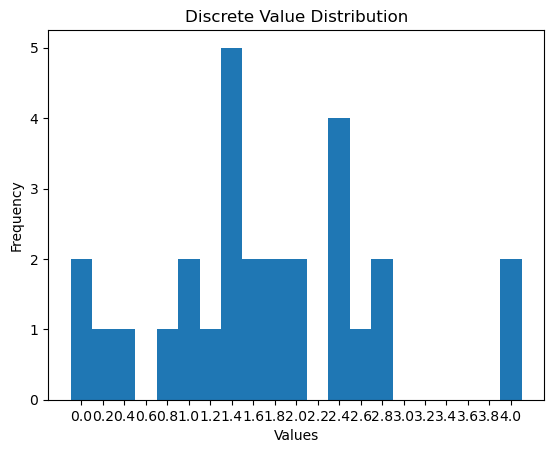

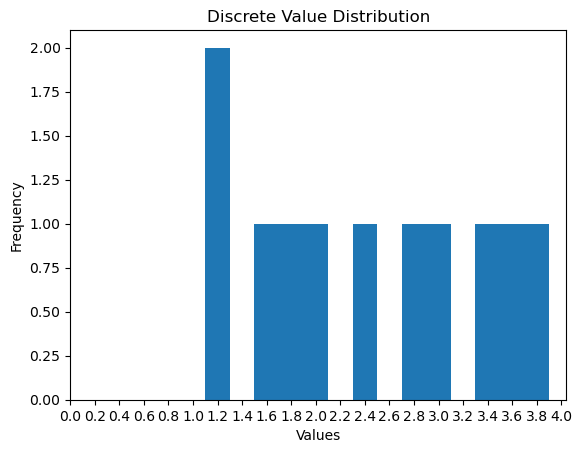

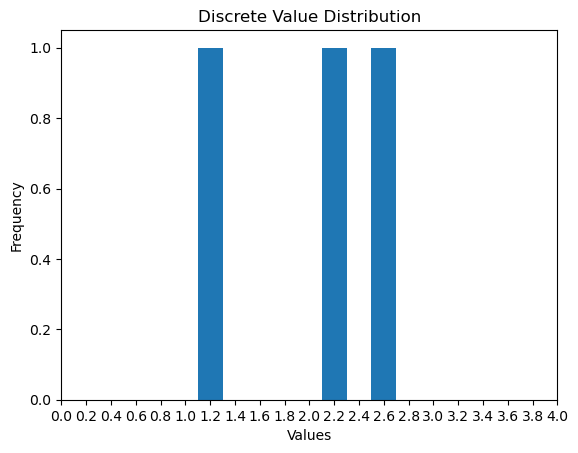

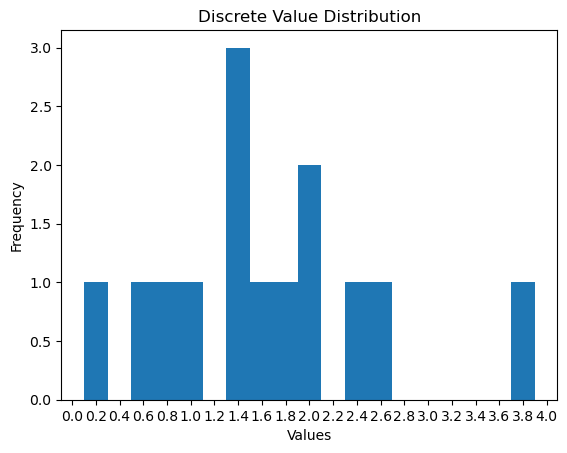

In [4]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)

In [2]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'DNCNN', 'pretrain': 'None'})
model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'DNCNN_epoch_179_alldata.pth'), map_location="cpu"), strict=True)
model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
validation:   0%|          | 5/1000 [00:00<00:59, 16.84it/s]

diff: -0.0441041
#
diff: -0.10304296
#
diff: 0.1173439
#
diff: 0.22357798
#
diff: -0.104851365
#
diff: 0.377214
#
diff: -0.35829383
#


validation:   1%|▏         | 13/1000 [00:00<00:34, 28.21it/s]

diff: -0.22935104
#
diff: 0.14187151
#
diff: 0.036791205
#
diff: -0.112130165
#
diff: 0.06034589
#
diff: 0.21767062
#
diff: 0.1642313
#


validation:   2%|▏         | 21/1000 [00:00<00:31, 30.88it/s]

diff: 0.11525929
#
diff: -0.19293809
#
diff: 0.22968197
#
diff: -0.17280301
#
diff: -0.038872123
#
diff: -0.31235075
#
diff: -0.1975832
#


validation:   2%|▎         | 25/1000 [00:00<00:31, 31.25it/s]

diff: -0.024157822
#
diff: -0.070972204
#
diff: 0.10768485
#
diff: -0.19286686
#
diff: -0.15751076
#
diff: -0.43975675
#
diff: 0.093245745
#


validation:   3%|▎         | 33/1000 [00:01<00:29, 32.51it/s]

diff: 0.23133183
#
diff: -0.278244
#
diff: 0.11022377
#
diff: 0.015224338
#
diff: -0.16881144
#
diff: -0.02090466
#
diff: -0.5539882
1
#


validation:   4%|▍         | 41/1000 [00:01<00:28, 33.70it/s]

diff: -0.47799343
#
diff: -0.26108986
#
diff: -0.25200033
#
diff: 0.023380756
#
diff: -0.005961895
#
diff: -0.06910086
#
diff: -0.13103294
#


validation:   5%|▍         | 49/1000 [00:01<00:27, 34.12it/s]

diff: 0.22698212
#
diff: -0.25108767
#
diff: 0.16209888
#
diff: 0.11438751
#
diff: 0.07960755
#
diff: 0.15835083
#
diff: 0.35795188
#


validation:   5%|▌         | 53/1000 [00:01<00:28, 33.45it/s]

diff: 0.33141208
#
diff: 0.02113843
#
diff: 0.06702423
#
diff: -0.08264446
#
diff: 0.28232598
#
diff: 0.17129815
#
diff: 0.049126625
#


validation:   6%|▌         | 61/1000 [00:01<00:27, 33.67it/s]

diff: -0.059481382
#
diff: -0.43109655
#
diff: 0.4679308
#
diff: -0.2016201
#
diff: 0.24377966
#
diff: 0.13069236
#
diff: -0.09490335
#


validation:   7%|▋         | 69/1000 [00:02<00:27, 33.67it/s]

diff: 0.13825405
#
diff: 0.051390886
#
diff: 0.39309835
#
diff: -0.35395718
#
diff: -0.1782046
#
diff: -0.105865955
#
diff: -0.066496134
#


validation:   8%|▊         | 77/1000 [00:02<00:26, 35.09it/s]

diff: 0.052907944
#
diff: 0.1824615
#
diff: -0.25941944
#
diff: 0.38242856
#
diff: 0.20731711
#
diff: 0.4683312
#
diff: 0.16595197
#


validation:   8%|▊         | 81/1000 [00:02<00:26, 34.10it/s]

diff: 0.23261166
#
diff: -0.24443293
#
diff: -0.18635845
#
diff: 0.103762835
#
diff: 0.118677005
#
diff: -0.16527367
#
diff: 0.34277594
#


validation:   9%|▉         | 89/1000 [00:02<00:26, 33.91it/s]

diff: 0.1227901
#
diff: -0.09705567
#
diff: -0.0033240318
#
diff: -0.272058
#
diff: 0.0061371326
#
diff: -0.078710556
#
diff: -0.22183895
#


validation:  10%|▉         | 97/1000 [00:03<00:26, 33.84it/s]

diff: -0.007204056
#
diff: 0.079450965
#
diff: -0.19449568
#
diff: 0.089457944
#
diff: 0.2698732
#
diff: -0.23384607
#
diff: -0.21091914
#


validation:  10%|█         | 105/1000 [00:03<00:26, 33.76it/s]

diff: -0.29932332
#
diff: 0.2823615
#
diff: -0.332263
#
diff: -0.4716344
#
diff: -0.30026865
#
diff: 0.25720596
#
diff: -0.10824692
#


validation:  11%|█         | 109/1000 [00:03<00:25, 34.56it/s]

diff: 0.039984226
#
diff: 0.0051631927
#
diff: 0.21985728
#
diff: -0.23815536
#
diff: 0.028523445
#
diff: 0.04783702
#
diff: -0.066046536
#


validation:  12%|█▏        | 117/1000 [00:03<00:25, 34.48it/s]

diff: -0.55964005
2
#
diff: -0.18743217
#
diff: -0.21419811
#
diff: 0.12391573
#
diff: 0.24982524
#
diff: 0.24343455
#
diff: 0.12484288
#


validation:  12%|█▎        | 125/1000 [00:03<00:25, 34.10it/s]

diff: 0.026525617
#
diff: -0.53612936
3
#
diff: -0.34309363
#
diff: -0.34485388
#
diff: -0.17235875
#
diff: -0.4214297
#
diff: -0.17143941
#
diff: 0.08748436
#


validation:  13%|█▎        | 133/1000 [00:04<00:25, 34.06it/s]

diff: 0.1493704
#
diff: -0.018659353
#
diff: 0.12743855
#
diff: -0.091329694
#
diff: -0.0030007362
#
diff: -0.26013517
#
diff: 0.1971426
#


validation:  14%|█▍        | 141/1000 [00:04<00:25, 33.90it/s]

diff: -0.057914734
#
diff: -0.3091634
#
diff: 0.049961567
#
diff: 0.28028435
#
diff: -0.38412392
#
diff: -0.19268721
#
diff: 0.055015087
#


validation:  15%|█▍        | 149/1000 [00:04<00:24, 34.74it/s]

diff: -0.34293532
#
diff: 0.073037386
#
diff: -0.265126
#
diff: 0.15184128
#
diff: -0.25447285
#
diff: -0.22231603
#
diff: 0.19593954
#
diff: 0.10154101
#


validation:  15%|█▌        | 153/1000 [00:04<00:25, 33.87it/s]

diff: -0.24005437
#
diff: 0.09706256
#
diff: 0.24000978
#
diff: 0.07440066
#
diff: -0.17260802
#
diff: 0.19155073
#
diff: -0.4883715
#


validation:  16%|█▌        | 161/1000 [00:04<00:24, 33.80it/s]

diff: -0.3499565
#
diff: 0.031271696
#
diff: -0.3752296
#
diff: 0.15536833
#
diff: -0.15287635
#
diff: 0.1940136
#
diff: 0.1560638
#


validation:  17%|█▋        | 169/1000 [00:05<00:24, 33.65it/s]

diff: -0.030735254
#
diff: 0.10852599
#
diff: 0.3591181
#
diff: -0.27352667
#
diff: -0.071648836
#
diff: 0.10922694
#
diff: 0.05189061
#


validation:  18%|█▊        | 177/1000 [00:05<00:24, 33.69it/s]

diff: -0.010805488
#
diff: -0.5428586
4
#
diff: -0.6401018
5
#
diff: 0.15620875
#
diff: 0.20375204
#
diff: -0.10570049
#
diff: -0.07954693
#


validation:  18%|█▊        | 181/1000 [00:05<00:23, 34.51it/s]

diff: 0.0873394
#
diff: -0.44146645
#
diff: 0.45865142
#
diff: -0.13604522
#
diff: 0.14532697
#
diff: -0.4669472
#
diff: 0.052075922
#


validation:  19%|█▉        | 189/1000 [00:05<00:24, 33.70it/s]

diff: -0.35535496
#
diff: -0.3426708
#
diff: -0.050333023
#
diff: 0.106958054
#
diff: 0.10783167
#
diff: 0.24984789
#
diff: 0.103877544
#
diff: -0.2843771
#


validation:  20%|█▉        | 197/1000 [00:05<00:23, 33.72it/s]

diff: 0.2964828
#
diff: 0.49836266
#
diff: -0.007511258
#
diff: 0.27269602
#
diff: -0.63193583
6
#
diff: -0.07259059
#
diff: 0.23900235
#


validation:  20%|██        | 205/1000 [00:06<00:23, 33.36it/s]

diff: -0.2252258
#
diff: 0.48750234
#
diff: -0.18933856
#
diff: -0.0439595
#
diff: -0.19695473
#
diff: -0.2714393
#
diff: 0.31515765
#


validation:  21%|██▏       | 213/1000 [00:06<00:23, 33.55it/s]

diff: 0.071881294
#
diff: 0.21578026
#
diff: 0.077114224
#
diff: 0.12456596
#
diff: -0.05654204
#
diff: -0.117782235
#
diff: 0.028987944
#
diff: 0.028500855
#


validation:  22%|██▏       | 221/1000 [00:06<00:22, 34.25it/s]

diff: -0.13321376
#
diff: 0.035441875
#
diff: -0.014877796
#
diff: -0.1990788
#
diff: -0.109372616
#
diff: 0.17954361
#
diff: 0.4899273
#


validation:  22%|██▎       | 225/1000 [00:06<00:23, 33.63it/s]

diff: 0.14135218
#
diff: 0.042226553
#
diff: 0.19074404
#
diff: 0.68863344
7
#
diff: 0.12581646
#
diff: -0.18806005
#
diff: 0.037885487
#


validation:  23%|██▎       | 233/1000 [00:07<00:23, 33.21it/s]

diff: 0.0366199
#
diff: -0.35970163
#
diff: -0.077982426
#
diff: -0.16967356
#
diff: -0.12616754
#
diff: -0.033397198
#
diff: -0.28619742
#


validation:  24%|██▍       | 241/1000 [00:07<00:21, 34.81it/s]

diff: 0.20124151
#
diff: -0.13048506
#
diff: -0.39558077
#
diff: -0.30131269
#
diff: -0.16562337
#
diff: 0.2829938
#
diff: 0.06330252
#
diff: -0.013588905
#


validation:  25%|██▍       | 249/1000 [00:07<00:22, 33.33it/s]

diff: 0.3861016
#
diff: -0.08992791
#
diff: -0.6393664
8
#
diff: 0.12913561
#
diff: -0.6880238
9
#
diff: 0.44058752
#
diff: 0.10097611
#


validation:  26%|██▌       | 257/1000 [00:07<00:21, 34.91it/s]

diff: -0.08884776
#
diff: -0.20763946
#
diff: -0.06462149
#
diff: -0.23647839
#
diff: -0.12173724
#
diff: -0.5351093
10
#
diff: -0.05224967
#


validation:  26%|██▌       | 261/1000 [00:07<00:21, 33.97it/s]

diff: 0.052190423
#
diff: -0.48026562
#
diff: -0.17411304
#
diff: -0.22325134
#
diff: 0.18299007
#
diff: 0.038775563
#
diff: 0.18005896
#


validation:  27%|██▋       | 269/1000 [00:08<00:21, 33.80it/s]

diff: -0.042926908
#
diff: 0.31465077
#
diff: 0.09930823
#
diff: 0.07102013
#
diff: 0.39795208
#
diff: -0.058906317
#
diff: 0.25142765
#


validation:  28%|██▊       | 277/1000 [00:08<00:21, 33.76it/s]

diff: -0.039342165
#
diff: 0.3183905
#
diff: -0.029607058
#
diff: -0.10261917
#
diff: -0.11123443
#
diff: 0.09669042
#
diff: -0.17323625
#


validation:  28%|██▊       | 285/1000 [00:08<00:20, 34.84it/s]

diff: -0.18204331
#
diff: -0.30236197
#
diff: -0.59552073
11
#
diff: 0.08980515
#
diff: -0.13785362
#
diff: 0.33736396
#
diff: -0.44602442
#


validation:  29%|██▉       | 289/1000 [00:08<00:20, 33.90it/s]

diff: -0.025074303
#
diff: 0.047290087
#
diff: -0.15090358
#
diff: -0.87730634
12
#
diff: -0.10958791
#
diff: 0.14297056
#
diff: 0.19058466
#


validation:  30%|██▉       | 297/1000 [00:08<00:20, 34.63it/s]

diff: -0.060429096
#
diff: 0.108597755
#
diff: 0.10081059
#
diff: 0.2795201
#
diff: -0.16746247
#
diff: 0.24291372
#
diff: 0.040621758
#
diff: 0.1375072
#


validation:  30%|███       | 305/1000 [00:09<00:19, 34.93it/s]

diff: -0.11071396
#
diff: 0.08614397
#
diff: 0.11236453
#
diff: -0.3972361
#
diff: -0.25324035
#
diff: -0.48700213
#
diff: 0.05888939
#


validation:  31%|███▏      | 313/1000 [00:09<00:19, 34.71it/s]

diff: -0.2435317
#
diff: -0.05800283
#
diff: -0.5259098
13
#
diff: 0.051136732
#
diff: 0.3214655
#
diff: -0.17423654
#
diff: 0.04126954
#


validation:  32%|███▏      | 321/1000 [00:09<00:19, 34.60it/s]

diff: 0.08728617
#
diff: -0.23831713
#
diff: -0.09156442
#
diff: 0.19080901
#
diff: 0.120366335
#
diff: -0.07315886
#
diff: 0.02448231
#


validation:  32%|███▎      | 325/1000 [00:09<00:19, 33.78it/s]

diff: -0.3005448
#
diff: 0.25816703
#
diff: -0.11436081
#
diff: -0.41191435
#
diff: -0.051007986
#
diff: -0.3020532
#
diff: -0.15723568
#


validation:  33%|███▎      | 333/1000 [00:09<00:19, 33.76it/s]

diff: -0.26426065
#
diff: -0.09320001
#
diff: -0.34722054
#
diff: -0.114028454
#
diff: 0.077788174
#
diff: 0.30116844
#
diff: -0.40065122
#


validation:  34%|███▍      | 341/1000 [00:10<00:19, 33.99it/s]

diff: -0.12870365
#
diff: 0.2556255
#
diff: -0.22833061
#
diff: -0.27675843
#
diff: 0.09218502
#
diff: -0.17842364
#
diff: 0.36102486
#


validation:  35%|███▍      | 349/1000 [00:10<00:18, 34.27it/s]

diff: 0.115774155
#
diff: -0.10776372
#
diff: -0.31581688
#
diff: -0.053403735
#
diff: -0.25577593
#
diff: 0.32472754
#
diff: -0.39592218
#


validation:  35%|███▌      | 353/1000 [00:10<00:18, 34.93it/s]

diff: -0.26323962
#
diff: 0.023427963
#
diff: 0.22301424
#
diff: -0.122430325
#
diff: -0.22311997
#
diff: 0.077531576
#
diff: -0.09171057
#


validation:  36%|███▌      | 361/1000 [00:10<00:18, 33.87it/s]

diff: -0.08598256
#
diff: 0.17477798
#
diff: 0.062443614
#
diff: 0.098802924
#
diff: 0.04410863
#
diff: 0.1308322
#
diff: 0.025533915
#


validation:  37%|███▋      | 369/1000 [00:11<00:18, 33.73it/s]

diff: -0.01499784
#
diff: -0.760388
14
#
diff: 0.09368348
#
diff: -0.10250473
#
diff: 0.23363686
#
diff: -0.19700933
#
diff: -0.02616918
#
diff: 0.09046438
#


validation:  38%|███▊      | 377/1000 [00:11<00:17, 34.64it/s]

diff: 0.2553786
#
diff: 0.20158076
#
diff: -0.16383946
#
diff: 0.6411801
15
#
diff: -0.44198996
#
diff: 0.1292406
#
diff: 0.0787576
#


validation:  38%|███▊      | 385/1000 [00:11<00:17, 34.59it/s]

diff: 0.25429583
#
diff: 0.17376804
#
diff: 0.24882877
#
diff: 0.023184896
#
diff: -0.25019407
#
diff: -0.32206511
#
diff: -0.33315718
#


validation:  39%|███▉      | 389/1000 [00:11<00:18, 33.77it/s]

diff: 0.16717601
#
diff: -0.12790322
#
diff: -0.30098116
#
diff: 0.13422197
#
diff: -0.3811522
#
diff: -0.24707949
#
diff: 0.24738216
#


validation:  40%|███▉      | 397/1000 [00:11<00:17, 33.75it/s]

diff: -0.0060162544
#
diff: 0.24696326
#
diff: -0.16433287
#
diff: 0.0045285225
#
diff: 0.049968004
#
diff: 0.028077602
#
diff: -0.10102987
#


validation:  40%|████      | 405/1000 [00:12<00:17, 33.71it/s]

diff: -0.48527443
#
diff: -0.52452993
16
#
diff: -0.4028058
#
diff: -0.23807478
#
diff: 0.2782218
#
diff: 0.07048086
#
diff: -0.18086982
#


validation:  41%|████▏     | 413/1000 [00:12<00:16, 34.65it/s]

diff: 0.07214999
#
diff: -0.09281814
#
diff: -0.18325996
#
diff: -0.03717661
#
diff: 0.043926
#
diff: 0.0968914
#
diff: -0.15191674
#
diff: -0.17711973
#


validation:  42%|████▏     | 421/1000 [00:12<00:17, 33.24it/s]

diff: 0.21661544
#
diff: 0.014475375
#
diff: -0.064370155
#
diff: -0.47721457
#
diff: -0.19102573
#
diff: -0.06335235
#
diff: -0.18211198
#


validation:  42%|████▎     | 425/1000 [00:12<00:16, 34.18it/s]

diff: 0.14605641
#
diff: -0.14853334
#
diff: -0.11551207
#
diff: 0.24193335
#
diff: -0.04118097
#
diff: 0.2191546
#
diff: 0.06712204
#


validation:  43%|████▎     | 433/1000 [00:12<00:16, 34.33it/s]

diff: -0.6918627
17
#
diff: -0.16825378
#
diff: 0.15003824
#
diff: 0.13154793
#
diff: 0.029847145
#
diff: 0.010696173
#
diff: -0.3968997
#


validation:  44%|████▍     | 441/1000 [00:13<00:16, 33.52it/s]

diff: 0.12185168
#
diff: -0.6519797
18
#
diff: 0.11378169
#
diff: -0.20172
#
diff: 0.14726579
#
diff: 0.06865347
#
diff: -0.020344973
#


validation:  45%|████▍     | 449/1000 [00:13<00:16, 34.36it/s]

diff: 0.27921915
#
diff: 0.3889717
#
diff: 0.44589877
#
diff: -0.17192164
#
diff: -0.26403284
#
diff: -0.112012684
#
diff: -0.35687375
#


validation:  45%|████▌     | 453/1000 [00:13<00:16, 33.61it/s]

diff: 0.32031882
#
diff: 0.14365053
#
diff: -0.15209532
#
diff: 0.15060997
#
diff: -0.20808697
#
diff: -0.037818074
#
diff: 0.473217
#


validation:  46%|████▌     | 461/1000 [00:13<00:16, 33.68it/s]

diff: -0.078286886
#
diff: 0.29269242
#
diff: -0.28939867
#
diff: 0.21195269
#
diff: 0.22844362
#
diff: -0.26501024
#
diff: -0.19743586
#


validation:  47%|████▋     | 469/1000 [00:13<00:15, 33.84it/s]

diff: -0.4351294
#
diff: -0.14682317
#
diff: -0.05713725
#
diff: 0.19984424
#
diff: -0.26130176
#
diff: 0.21626769
#
diff: 0.107088536
#


validation:  48%|████▊     | 477/1000 [00:14<00:14, 35.11it/s]

diff: 0.07837832
#
diff: -0.27761388
#
diff: 0.23556542
#
diff: -0.15057623
#
diff: 0.016593218
#
diff: -0.12170589
#
diff: -0.24224949
#


validation:  48%|████▊     | 481/1000 [00:14<00:15, 34.12it/s]

diff: -0.11618161
#
diff: 0.14666557
#
diff: 0.2721026
#
diff: -0.07208562
#
diff: 0.038012624
#
diff: -0.22417498
#


validation:  49%|████▉     | 489/1000 [00:14<00:15, 33.71it/s]

diff: 0.008669138
#
diff: -0.38353214
#
diff: 0.06356895
#
diff: -0.08434844
#
diff: 0.05220282
#
diff: -0.47446704
#
diff: -0.3163752
#


validation:  50%|████▉     | 497/1000 [00:14<00:14, 33.73it/s]

diff: 0.48596
#
diff: -0.016152859
#
diff: 0.14786208
#
diff: -0.1772523
#
diff: -0.02580452
#
diff: 0.6254153
19
#
diff: 0.16230167
#


validation:  50%|█████     | 501/1000 [00:14<00:14, 34.53it/s]

diff: -0.13736439
#
diff: 0.0639956
#
diff: -0.49869144
#
diff: -0.19470906
#
diff: 0.092749834
#
diff: -0.110856056
#
diff: -0.47961855
#


validation:  51%|█████     | 509/1000 [00:15<00:14, 34.39it/s]

diff: 0.1432035
#
diff: -0.02627492
#
diff: -0.005756676
#
diff: -0.09096742
#
diff: -0.15519285
#
diff: -0.19863224
#
diff: -0.10594183
#


validation:  52%|█████▏    | 517/1000 [00:15<00:14, 34.02it/s]

diff: 0.16382658
#
diff: -0.10666418
#
diff: 0.11498332
#
diff: 0.0770061
#
diff: -0.16493225
#
diff: -0.05265522
#
diff: 0.033247948
#


validation:  52%|█████▎    | 525/1000 [00:15<00:13, 34.46it/s]

diff: -0.22200745
#
diff: 0.054848194
#
diff: -0.100691676
#
diff: 0.1803062
#
diff: -0.2614925
#
diff: -0.10035592
#
diff: 0.15053187
#
diff: 0.2328651
#


validation:  53%|█████▎    | 533/1000 [00:15<00:13, 34.46it/s]

diff: 0.14419842
#
diff: 0.21517932
#
diff: 0.087572336
#
diff: 0.0024347305
#
diff: -0.02555585
#
diff: 0.09542763
#
diff: -0.029274225
#


validation:  54%|█████▎    | 537/1000 [00:15<00:13, 33.69it/s]

diff: -0.21359587
#
diff: 0.18315566
#
diff: -0.6402925
20
#
diff: -0.10409117
#
diff: -0.056563854
#
diff: -0.02677095
#
diff: -0.094763756
#


validation:  55%|█████▍    | 545/1000 [00:16<00:13, 33.78it/s]

diff: 0.07047558
#
diff: -0.06547654
#
diff: -0.012063026
#
diff: -0.37374067
#
diff: 0.41542602
#
diff: -0.12965226
#
diff: -0.25862503
#


validation:  55%|█████▌    | 553/1000 [00:16<00:12, 35.08it/s]

diff: 0.15383613
#
diff: -0.36319518
#
diff: -0.1477263
#
diff: 0.21628141
#
diff: -0.0852952
#
diff: 0.010170221
#
diff: 0.13058352
#


validation:  56%|█████▌    | 561/1000 [00:16<00:12, 34.80it/s]

diff: 0.07098174
#
diff: 0.04528451
#
diff: 0.028494596
#
diff: 0.27931404
#
diff: 0.15209627
#
diff: 0.10293484
#
diff: -0.6734878
21
#
diff: -0.11161041
#


validation:  57%|█████▋    | 569/1000 [00:16<00:12, 35.09it/s]

diff: 0.17339897
#
diff: -0.18184495
#
diff: -0.30824065
#
diff: 0.1607852
#
diff: 0.03277731
#
diff: 0.07453132
#
diff: 0.12779713
#


validation:  57%|█████▋    | 573/1000 [00:16<00:12, 34.10it/s]

diff: -0.16360581
#
diff: 0.25339818
#
diff: -0.08636284
#
diff: -0.44329858
#
diff: 0.16666162
#
diff: 0.0529418
#
diff: 0.035248637
#


validation:  58%|█████▊    | 581/1000 [00:17<00:12, 33.57it/s]

diff: -0.37875873
#
diff: -0.060468912
#
diff: 0.14468026
#
diff: -0.32926583
#
diff: -0.40509707
#
diff: 0.018131614
#
diff: 0.30792034
#


validation:  59%|█████▉    | 589/1000 [00:17<00:12, 33.65it/s]

diff: -0.07206082
#
diff: 0.053943634
#
diff: 0.012933493
#
diff: -0.325624
#
diff: 0.16272223
#
diff: -0.48181784
#
diff: -0.011483669
#


validation:  60%|█████▉    | 597/1000 [00:17<00:11, 34.07it/s]

diff: 0.15257144
#
diff: -0.20243537
#
diff: -0.14680123
#
diff: 0.18852425
#
diff: 0.16461247
#
diff: -0.033885717
#
diff: 0.09897733
#


validation:  60%|██████    | 601/1000 [00:17<00:11, 34.79it/s]

diff: -0.39623886
#
diff: 0.07978332
#
diff: -0.11388016
#
diff: -0.0087557435
#
diff: 0.16257775
#
diff: 0.007421851
#
diff: 0.15830618


validation:  61%|██████    | 609/1000 [00:18<00:11, 34.05it/s]

#
diff: -0.07786548
#
diff: 0.48245534
#
diff: 0.024172306
#
diff: 0.105547786
#
diff: 0.19458938
#
diff: -0.026231289
#
diff: 0.033096075
#


validation:  62%|██████▏   | 617/1000 [00:18<00:11, 33.84it/s]

diff: 0.20189625
#
diff: 0.24051905
#
diff: -0.08052921
#
diff: 0.103158474
#
diff: -0.20510173
#
diff: -0.21481836
#
diff: -0.26147842
#
diff: 0.15302658
#


validation:  62%|██████▎   | 625/1000 [00:18<00:10, 34.51it/s]

diff: -0.2991348
#
diff: -0.36202908
#
diff: -0.1371206
#
diff: -0.3631742
#
diff: 0.36300945
#
diff: -0.10123706
#
diff: -0.110868156
#


validation:  63%|██████▎   | 633/1000 [00:18<00:10, 34.50it/s]

diff: 0.005520582
#
diff: -0.0796026
#
diff: 0.064198494
#
diff: -0.0937047
#
diff: -0.43194777
#
diff: 0.19489205
#
diff: -0.23818874
#


validation:  64%|██████▎   | 637/1000 [00:18<00:10, 35.10it/s]

diff: 0.18413305
#
diff: 0.30732012
#
diff: -0.5166377
22
#
diff: 0.093263626
#
diff: 0.39210212
#
diff: 0.01613152
#
diff: -0.046517134
#


validation:  64%|██████▍   | 645/1000 [00:19<00:10, 34.77it/s]

diff: -0.0154310465
#
diff: 0.028565645
#
diff: -0.16175985
#
diff: 0.014923334
#
diff: -0.16695929
#
diff: 0.38336205
#
diff: -0.07707715
#


validation:  65%|██████▌   | 653/1000 [00:19<00:10, 34.62it/s]

diff: -0.43035245
#
diff: -0.31265533
#
diff: -0.0570361
#
diff: -0.025172234
#
diff: 0.3491757
#
diff: 0.121403456
#
diff: -0.32211602
#


validation:  66%|██████▌   | 661/1000 [00:19<00:10, 33.45it/s]

diff: 0.5388955
23
#
diff: 0.82313967
24
#
diff: 0.048391104
#
diff: 0.18154782
#
diff: -0.2760465
#
diff: -0.21129513
#
diff: -0.16082859
#


validation:  66%|██████▋   | 665/1000 [00:19<00:09, 34.28it/s]

diff: -0.22897112
#
diff: 0.10615349
#
diff: -0.044879496
#
diff: -0.34022427
#
diff: -0.0025705695
#
diff: 0.26396126
#
diff: 0.49145067
#


validation:  67%|██████▋   | 673/1000 [00:19<00:09, 34.40it/s]

diff: -0.14463472
#
diff: 0.0030653477
#
diff: 0.09763212
#
diff: -0.109552145
#
diff: 0.29559028
#
diff: -0.08651769
#
diff: -0.22744036
#


validation:  68%|██████▊   | 681/1000 [00:20<00:09, 34.47it/s]

diff: 0.0688684
#
diff: 0.28525996
#
diff: -0.40765166
#
diff: 0.31255746
#
diff: -0.041834593
#
diff: 0.24971342
#
diff: -0.1842112
#


validation:  69%|██████▉   | 689/1000 [00:20<00:08, 35.02it/s]

diff: -0.24269831
#
diff: 0.21812081
#
diff: -0.0038864613
#
diff: 0.011146307
#
diff: -0.063584566
#
diff: -0.4483137
#
diff: 0.031745404
#


validation:  69%|██████▉   | 693/1000 [00:20<00:09, 34.05it/s]

diff: -0.2228229
#
diff: 0.15482712
#
diff: -0.26946795
#
diff: -0.26934886
#
diff: 0.07088637
#
diff: -0.37183905
#
diff: -0.34126115
#


validation:  70%|███████   | 701/1000 [00:20<00:08, 34.71it/s]

diff: -0.034972668
#
diff: 0.15290618
#
diff: 0.45424163
#
diff: -0.30362546
#
diff: 0.24214458
#
diff: 0.008407593
#
diff: -0.11386156
#


validation:  71%|███████   | 709/1000 [00:20<00:08, 34.62it/s]

diff: -0.08236897
#
diff: -0.2778461
#
diff: 0.044428706
#
diff: 0.036355615
#
diff: -0.27468562
#
diff: 0.19312198
#
diff: -0.14446056
#


validation:  72%|███████▏  | 717/1000 [00:21<00:08, 33.69it/s]

diff: 0.24698782
#
diff: -0.2579968
#
diff: 0.018786907
#
diff: 0.21662438
#
diff: 0.03450656
#
diff: -0.14088356
#
diff: 0.26786184
#


validation:  72%|███████▎  | 725/1000 [00:21<00:07, 34.69it/s]

diff: 0.11363804
#
diff: -0.06781602
#
diff: -0.26637983
#
diff: 0.17446966
#
diff: 0.15624738
#
diff: 0.15980417
#
diff: 0.00021958351
#
diff: 0.091516495
#


validation:  73%|███████▎  | 729/1000 [00:21<00:08, 33.83it/s]

diff: 0.10894346
#
diff: 0.23174262
#
diff: 0.04666114
#
diff: -0.013520539
#
diff: -0.04093957
#
diff: -0.14952266
#
diff: -0.1922796
#


validation:  74%|███████▎  | 737/1000 [00:21<00:07, 35.16it/s]

diff: -0.4522903
#
diff: 0.21634424
#
diff: -0.12420237
#
diff: -0.07038474
#
diff: -0.30833912
#
diff: -0.555091
25
#
diff: 0.22580367
#


validation:  74%|███████▍  | 745/1000 [00:21<00:07, 34.76it/s]

diff: 0.7737818
26
#
diff: 0.014837682
#
diff: -0.4474753
#
diff: 0.102804184
#
diff: 0.01399827
#
diff: -0.052658677
#
diff: 0.19293302
#


validation:  75%|███████▌  | 753/1000 [00:22<00:07, 34.21it/s]

diff: 0.15623283
#
diff: -0.11439055
#
diff: -0.085600436
#
diff: -0.78928083
27
#
diff: -0.18262577
#
diff: 0.1454668
#
diff: 0.25313073
#


validation:  76%|███████▌  | 757/1000 [00:22<00:06, 35.17it/s]

diff: -0.4497068
#
diff: -0.5469463
28
#
diff: -0.1636455
#
diff: 0.014022589
#
diff: -0.10603571
#
diff: -0.0462507
#
diff: 0.08858873
#


validation:  76%|███████▋  | 765/1000 [00:22<00:07, 33.44it/s]

diff: 0.11729297
#
diff: 0.18340492
#
diff: 0.10394192
#
diff: -0.25698113
#
diff: -0.21682811
#
diff: 0.11590099
#
diff: -0.060329795
#
diff: -0.07309294
#


validation:  77%|███████▋  | 773/1000 [00:22<00:06, 33.83it/s]

diff: 0.116904736
#
diff: -0.4031012
#
diff: -0.024297595
#
diff: -0.23347282
#
diff: 0.3955593
#
diff: -0.038143873
#
diff: -0.31837785
#


validation:  78%|███████▊  | 781/1000 [00:23<00:06, 33.90it/s]

diff: 0.11083397
#
diff: 0.12020589
#
diff: 0.06924212
#
diff: 0.01042521
#
diff: -0.013481319
#
diff: -0.32808352
#
diff: -0.26840168
#


validation:  79%|███████▉  | 789/1000 [00:23<00:06, 33.81it/s]

diff: 0.056574345
#
diff: 0.22142422
#
diff: -0.3276949
#
diff: -0.043769658
#
diff: -0.03204465
#
diff: -0.25721967
#
diff: -0.37433589
#


validation:  79%|███████▉  | 793/1000 [00:23<00:05, 34.60it/s]

diff: -0.30773652
#
diff: -0.05577469
#
diff: 0.06401817
#
diff: -0.043868303
#
diff: -0.36752987
#
diff: -0.12583995
#
diff: -0.00060248375
#


validation:  80%|████████  | 801/1000 [00:23<00:05, 34.46it/s]

diff: 0.1581068
#
diff: -0.70572627
29
#
diff: -0.22773993
#
diff: 0.5272014
30
#
diff: -0.00088763237
#
diff: -0.25671172
#
diff: 0.33209825
#


validation:  81%|████████  | 809/1000 [00:23<00:05, 34.50it/s]

diff: 0.030433059
#
diff: 0.097313404
#
diff: -0.11505568
#
diff: -0.030313015
#
diff: -0.06692642
#
diff: -0.023450375
#
diff: 0.18833315
#


validation:  82%|████████▏ | 817/1000 [00:24<00:05, 35.03it/s]

diff: 0.4589213
#
diff: -0.55121446
31
#
diff: -0.33732367
#
diff: 0.28684735
#
diff: 0.28072166
#
diff: 0.4739507
#
diff: -0.053732157
#


validation:  82%|████████▏ | 821/1000 [00:24<00:05, 34.15it/s]

diff: -0.0654788
#
diff: -0.007961512
#
diff: -0.6948632
32
#
diff: 0.028405905
#
diff: 0.11711526
#
diff: 0.09808564
#
diff: 0.040483236
#


validation:  83%|████████▎ | 829/1000 [00:24<00:04, 34.95it/s]

diff: 0.30965185
#
diff: -0.04188168
#
diff: -0.08077681
#
diff: -0.12974787
#
diff: 0.31742692
#
diff: -0.0030171871
#
diff: 0.10472727
#


validation:  84%|████████▎ | 837/1000 [00:24<00:04, 34.65it/s]

diff: -0.11332226
#
diff: -0.31571436
#
diff: -0.119695425
#
diff: -0.23956513
#
diff: 0.15222716
#
diff: 0.0763464
#
diff: -0.18288207
#


validation:  84%|████████▍ | 845/1000 [00:24<00:04, 34.60it/s]

diff: 0.25868082
#
diff: 0.07839799
#
diff: -0.26845312
#
diff: 0.10255146
#
diff: -0.133178
#
diff: -0.10900283
#
diff: -0.09294152
#


validation:  85%|████████▌ | 853/1000 [00:25<00:04, 34.78it/s]

diff: -0.10394013
#
diff: -0.14702153
#
diff: -0.05769062
#
diff: -0.27706683
#
diff: -0.41699362
#
diff: 0.0007033348
#
diff: 0.18800843
#
diff: -0.31249332
#


validation:  86%|████████▌ | 857/1000 [00:25<00:04, 33.85it/s]

diff: -0.48719025
#
diff: 0.35019076
#
diff: 0.19686097
#
diff: -0.107842445
#
diff: -0.53180885
33
#
diff: -0.04569006
#
diff: 0.16991973
#


validation:  86%|████████▋ | 865/1000 [00:25<00:03, 34.20it/s]

diff: 0.02767235
#
diff: -0.22141385
#
diff: 0.0072385073
#
diff: 0.17228043
#
diff: 0.3431971
#
diff: 0.38471377
#
diff: 0.01061511
#


validation:  87%|████████▋ | 873/1000 [00:25<00:03, 34.17it/s]

diff: -0.24564898
#
diff: -0.0350917
#
diff: -0.64814854
34
#
diff: -0.12015557
#
diff: -0.07720494
#
diff: 0.13279024
#
diff: -0.24861228
#


validation:  88%|████████▊ | 881/1000 [00:25<00:03, 34.36it/s]

diff: -0.43153763
#
diff: 0.43274885
#
diff: 0.169765
#
diff: -0.08165741
#
diff: 0.09033179
#
diff: -0.25084543
#
diff: -0.21361883
#


validation:  88%|████████▊ | 885/1000 [00:26<00:03, 33.61it/s]

diff: 0.15637517
#
diff: -0.39655802
#
diff: 0.032306194
#
diff: 0.0010008812
#
diff: -0.21308541
#
diff: 0.0698688
#
diff: 0.057709277
#


validation:  89%|████████▉ | 893/1000 [00:26<00:03, 33.81it/s]

diff: 0.18352199
#
diff: 0.10037494
#
diff: 0.05371332
#
diff: 0.06742096
#
diff: 0.052063227
#
diff: 0.034332514
#
diff: 0.54170847
35
#


validation:  90%|█████████ | 901/1000 [00:26<00:02, 33.77it/s]

diff: 0.31149608
#
diff: 0.21675062
#
diff: 0.25882006
#
diff: -0.31283498
#
diff: -0.47790837
#
diff: 0.39766145
#
diff: -0.10085747
#


validation:  91%|█████████ | 909/1000 [00:26<00:02, 33.83it/s]

diff: 0.09512138
#
diff: 0.057569027
#
diff: -0.48961502
#
diff: 0.06471968
#
diff: -0.20431268
#
diff: -0.30925632
#
diff: 0.2055347
#


validation:  91%|█████████▏| 913/1000 [00:26<00:02, 33.75it/s]

diff: 0.14959168
#
diff: 0.024533272
#
diff: 0.49268466
#
diff: 0.0048793554
#
diff: 0.19066644
#
diff: -0.18440604
#


validation:  92%|█████████▏| 921/1000 [00:27<00:02, 34.14it/s]

diff: -0.07328808
#
diff: 0.027891397
#
diff: 0.09581649
#
diff: -0.1302216
#
diff: 0.30279732
#
diff: -0.041563272
#
diff: 0.28779626
#


validation:  93%|█████████▎| 929/1000 [00:27<00:02, 34.59it/s]

diff: -0.09581268
#
diff: -0.29234946
#
diff: -0.101284504
#
diff: -0.15457988
#
diff: -0.0013606548
#
diff: 0.10121925
#
diff: 0.051519394
#


validation:  93%|█████████▎| 933/1000 [00:27<00:01, 33.77it/s]

diff: 0.019634336
#
diff: -0.010862112
#
diff: -0.08490932
#
diff: 0.049339056
#
diff: -0.12195289
#
diff: -0.14207387
#
diff: -0.08408618
#


validation:  94%|█████████▍| 941/1000 [00:27<00:01, 33.75it/s]

diff: 0.19409692
#
diff: -0.041561127
#
diff: 0.07153702
#
diff: 0.24469738
#
diff: -0.06598675
#
diff: -0.12781191
#
diff: -0.015613556
#


validation:  95%|█████████▍| 949/1000 [00:27<00:01, 34.87it/s]

diff: 0.13100909
#
diff: 0.120726824
#
diff: -0.023352385
#
diff: -0.751944
36
#
diff: -0.12842238
#
diff: 0.22884989
#
diff: 0.01599145
#


validation:  96%|█████████▌| 957/1000 [00:28<00:01, 34.70it/s]

diff: -0.31429935
#
diff: 0.2031095
#
diff: 0.2741841
#
diff: -0.5954125
37
#
diff: -0.35454023
#
diff: 0.28705204
#
diff: 0.23906112
#


validation:  96%|█████████▌| 961/1000 [00:28<00:01, 33.80it/s]

diff: -0.2096169
#
diff: -0.20060062
#
diff: -0.39975715
#
diff: -0.27396798
#
diff: -0.39504457
#
diff: -0.07255632
#
diff: -0.10867119
#


validation:  97%|█████████▋| 969/1000 [00:28<00:00, 33.98it/s]

diff: -0.06106758
#
diff: 0.11726272
#
diff: 0.14571953
#
diff: 0.1015119
#
diff: -0.13026506
#
diff: 0.24113756
#
diff: -0.14617276
#


validation:  98%|█████████▊| 977/1000 [00:28<00:00, 33.85it/s]

diff: -0.23290539
#
diff: -0.07531619
#
diff: -0.6120112
38
#
diff: -0.32403946
#
diff: 0.53963923
39
#
diff: -0.0060595274
#
diff: -0.30262375
#


validation:  98%|█████████▊| 985/1000 [00:29<00:00, 34.00it/s]

diff: 0.19392633
#
diff: -0.109616995
#
diff: 0.053951204
#
diff: -0.3375504
#
diff: 0.28593755
#
diff: 0.46895522
#
diff: 0.030734062
#


validation:  99%|█████████▉| 989/1000 [00:29<00:00, 34.68it/s]

diff: -0.007779479
#
diff: -0.21323287
#
diff: 0.14314556
#
diff: 0.7355106
40
#
diff: -0.021573246
#
diff: 0.11245167
#
diff: 0.17683536
#


validation: 100%|█████████▉| 997/1000 [00:29<00:00, 34.57it/s]

diff: 0.8813655
41
#
diff: 0.14518571
#
diff: 0.46722913
#
diff: 0.53251195
42
#
diff: -0.106360674
#
diff: -0.47240567
#
diff: -0.34922302
#


validation: 100%|██████████| 1000/1000 [00:29<00:00, 33.95it/s, plcc=0.974, srocc=0.974, krocc=0.876, overall=2.82, std=0.244]

diff: -0.043275833
#


42

In [ ]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)